In [25]:
import pandas as pd
import ast
f = pd.read_csv('flickr_tri.csv')
T = []
Omegas = []
min_omegas = []
max_omegas = []
H = []
for i in f.iterrows():
    t = int(i[1][0])
    omegas = ast.literal_eval(i[1][1])
    Omegas.append(omegas)
    T.append(t)
    min_omegas.append(min(omegas))
    max_omegas.append(max(omegas))
    H.append(float(i[1][2]))
    # print(i[1])

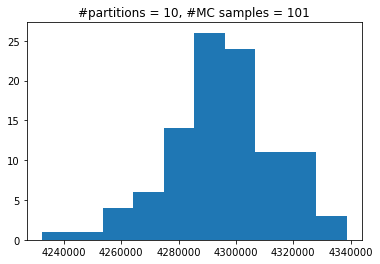

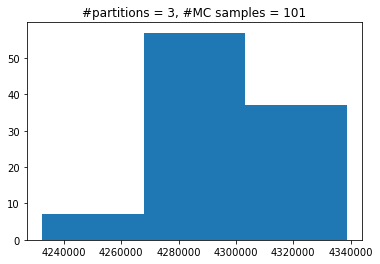

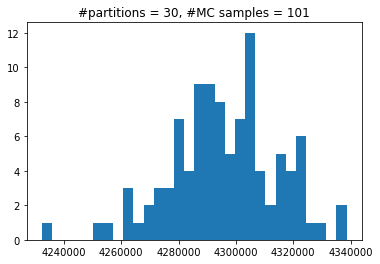

In [53]:
from matplotlib import pyplot as plt
import math
om = Omegas[-1]
# plt.subplots(111,figsize=(10,5))
num_bins = int(math.sqrt(len(om)))
plt.hist(om,bins = num_bins)
plt.title('#partitions = '+str(num_bins)+', #MC samples = '+str(len(om)))
ax= plt.gca(); ax.ticklabel_format(style='plain')
plt.show(); plt.close()

plt.hist(om,bins = num_bins//3)
plt.title('#partitions = '+str(int(num_bins/3))+', #MC samples = '+str(len(om)))
ax= plt.gca(); ax.ticklabel_format(style='plain')
plt.show(); plt.close()

plt.hist(om,bins = num_bins*3)
plt.title('#partitions = '+str(num_bins*3)+', #MC samples = '+str(len(om)))
ax= plt.gca(); ax.ticklabel_format(style='plain')
plt.show(); plt.close()

In [1]:
import os,json
# from unittest import result
import networkx as nx
from src.utils import *
from src.algorithm import Algorithm,ApproximateAlgorithm
from src.query import Query,wQuery,multiGraphQuery,multiGraphwQuery
import pandas as pd
from datetime import datetime
from reduce_main import singleQuery_singleRun

usage: ipykernel_launcher.py [-h] [-d DATASET] [-a ALGO] [-u UTYPE] [-k K]
                             [-v] [-s SOURCE] [-t TARGET] [-pr PROPERTY]
                             [-K K] [-ea EST_ALGO] [-q QUERYF] [-b BUCKETING]
                             [-dh HOP] [-db]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"e5cafa30-791f-49c4-935a-ab143b22dc1a" --shell=9002 --transport="tcp" --iopub=9004 --f=c:\Users\naheedanjum.arafat\AppData\Roaming\jupyter\runtime\kernel-v2-183049gHcijtMf7G9.json


SystemExit: 2

c:\Users\naheedanjum.arafat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
dataset = 'default'
property = 'reach'
source = 's'
target = 'y'
dhopreach = False 
hop = -1
k = 1 
G = get_dataset(dataset)
os.environ['time_seed'] = 'True'
if property == 'reach':
    if dhopreach:
        print('#<d-hop reachability (',source,',',target,')')
        Q = Query(G, 'reach_d',args = {'u':source,'v':target, 'd':hop})
    else:
        print('Reachability(',source,',',target,')')
        Q = Query(G,'reach',{'u':source,'v':target})

if property == 'sp':
    print('Shortest path')
    Q = wQuery(G,'sp',{'u':source,'v':target})
if property == 'tri':
    print('#Triangles')
    Q = Query(G,'tri')
a = Algorithm(G, Q, debug = True)
print("Greedy algorithm (w/ exact mem.): ")
a.algorithm5(k = k, update_type='o1', verbose = False)
M = a.algostat['M']
hatMList = []
for K in range(2,10):
    Q = Query(G,'reach',{'u':source,'v':target})
    a = ApproximateAlgorithm(G, Q, debug = True)
    a.algorithm5(property = Q.qtype, algorithm = 'exact', \
                    k = k, K = K, update_type='o1', verbose = False)
    hatMList.append(a.algostat['M'])
    print(a.algostat['result']['edges'])

weighted graph? =>  False
Reachability( s , y )
Greedy algorithm (w/ exact mem.): 
Iteration:  0
{1: {('x', 'y'): 0.8333333333333334, ('s', 'x'): 0.0, ('s', 'y'): 0, ('s', 'u'): 2.0}}
[('s', 'u')]
Iteration:  0
{1: {('x', 'y'): 0.5555555555555556, ('s', 'x'): 0.0, ('s', 'y'): 0, ('s', 'u'): 0}}
[('s', 'x')]
Iteration:  0
{1: {('x', 'y'): 0.8333333333333334, ('s', 'x'): 0, ('s', 'y'): 0, ('s', 'u'): 0}}
[('s', 'x')]
Iteration:  0
{1: {('x', 'y'): 1.0, ('s', 'x'): 0, ('s', 'y'): 0, ('s', 'u'): 0}}
[('x', 'y')]
Iteration:  0
{1: {('x', 'y'): 0, ('s', 'x'): 0, ('s', 'y'): 0, ('s', 'u'): 0}}
[('x', 'y')]
Iteration:  0
{1: {('x', 'y'): 0, ('s', 'x'): 0, ('s', 'y'): 0, ('s', 'u'): 0}}
[('x', 'y')]
Iteration:  0
{1: {('x', 'y'): 0, ('s', 'x'): 0, ('s', 'y'): 0, ('s', 'u'): 0}}
[('x', 'y')]
Iteration:  0
{1: {('x', 'y'): 0, ('s', 'x'): 0, ('s', 'y'): 0, ('s', 'u'): 0}}
[('x', 'y')]


In [18]:
hatMList[-1].items()

dict_items([(1, {('x', 'y'): 0, ('s', 'x'): 0, ('s', 'y'): 0, ('s', 'u'): 0})])

In [19]:
hatMList[-3]

{1: {('x', 'y'): 0, ('s', 'x'): 0, ('s', 'y'): 0, ('s', 'u'): 0}}

In [25]:
M

{0: {('x', 'y'): 0.18000000000000002,
  ('s', 'x'): 0.12000000000000004,
  ('s', 'y'): 0.0,
  ('s', 'u'): 0.22800000000000004},
 1: {('x', 'y'): 0.8200000000000001,
  ('s', 'x'): 0.88,
  ('s', 'y'): 1.0,
  ('s', 'u'): 0.772}}

### ER N vs dH Plot

In [2]:
# pr = 'tri'
pr = 'sp'
# pr='reach'
# alg = 'appr'
# alg = 'mcdij'
# alg = 'mcbfs'
alg='mcdij'
# alg = 'mcapproxtri'
# data = 'ER_15_22'
# data = 'flickr'
# data = 'rome'
data = 'biomine'
_max = -1
# invert = True
invert = False
loop = 'N' # 'T'
# loop = 'T'
epsilon = 0.001
# epsilon = 0.03
for q in [2,4]:
# for q in [1,2,3,4]:
# for q in [1]:
    qset = str(q)+'.queries.csv'
    fname = 'output/measure_'+data+'_'+alg+'_'+pr+'_'+qset 
    print(fname)
    import pandas as pd
    df = pd.read_csv(fname)
    # print(df.head())
    if invert:
        df  = df.iloc[::-1]
        # df = df.reindex(index=df.index[::-1])
    avg_df = df.groupby(loop)[['N','T','H']].mean()
    # avg_df = df
    # print(avg_df)
    avg_df['dHdN'] = avg_df['H'].diff()/avg_df[loop].diff()
    # if q == 4:
    #     print(avg_df)
    _filter = avg_df[avg_df['dHdN'].abs()<=epsilon]
    # print(_filter)
    Nstar = _filter.iloc[0][loop]
    print(qset, ' => ',Nstar)
    _max = max(Nstar,_max)
print(_max)
# avg_df

output/measure_biomine_mcdij_sp_2.queries.csv
2.queries.csv  =>  56.0
output/measure_biomine_mcdij_sp_4.queries.csv
4.queries.csv  =>  41.0
56.0


In [5]:
import pandas as pd

# pr = 'tri'
pr = 'reach'
# pr='sp'
# alg = 'appr'
# alg = 'mcdij'
alg = 'mcbfs'
# alg = 'mcapproxtri'
# data = 'ER_15_22'
# data = 'flickr'
# data = 'rome'
data = 'biomine'
_max = -1
# invert = True
invert = False
loop = 'N' # 'T'
# loop = 'T'
epsilon = 0.001
# epsilon = 0.03
step = 5
for q in [2,4]:
# for q in [1,2,3,4]:
# for q in [1]:
    qset = str(q)+'.queries.csv'
    # qset = str(q)+'.queries_NLoops.csv'
    fname = 'output/measure_'+data+'_'+alg+'_'+pr+'_'+qset 
    print(fname)
    df = pd.read_csv(fname)
    df[loop] = df[loop].astype('int')
    # print(df.shape)
    # print(df[loop].head(10))
    # print(df[loop]%5 == 1)
    df = df[df[loop]%5==1]
    # print(df.shape)
    if invert:
        df  = df.iloc[::-1]
        # df = df.reindex(index=df.index[::-1])
    avg_df = df.groupby(loop)[['N','T','H']].mean()
    # avg_df = df
    # print(avg_df)
    avg_df['dHdN'] = avg_df['H'].diff()/avg_df[loop].diff()
    # if q == 2:
    #     print(avg_df)
    boole = (avg_df['dHdN'].abs()<=epsilon)
    # print(boole)
    _last_False =  (boole[boole==False].index[-1])
    # print(_last_False)
    _filter = avg_df[boole]
    # print(_filter)
    # Nstar = _filter.iloc[_last_False][loop]
    Nstar = avg_df[avg_df.index==_last_False][loop].values[0]
    print('--',qset, ' => ',Nstar)
    _max = max(Nstar,_max)
print(_max)
# avg_df

output/measure_biomine_mcbfs_reach_2.queries.csv
-- 2.queries.csv  =>  46
output/measure_biomine_mcbfs_reach_4.queries.csv
-- 4.queries.csv  =>  171
171


output/ER_T_Loop/measure_ER_15_22_appr_reach_2.queries.csv
(5005, 12)
output/ER_T_Loop/measure_ER_15_22_appr_reach_4.queries.csv
(5005, 12)


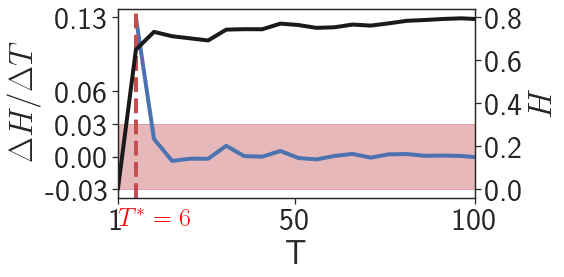

<Figure size 864x288 with 0 Axes>

In [214]:
import pandas as pd
from matplotlib.ticker import FormatStrFormatter

pr = 'reach'
# pr = 'sp'
# pr='tri'
alg = 'appr'
# alg = 'mcdij'
# alg = 'mcbfs'
# alg = 'mcapproxtri'
# data = 'products'
# data = 'papers'
# data = 'restaurants'
data = 'ER_15_22'
# data = 'flickr'
# data = 'rome'
# data = 'biomine'
_max = -1
invert = True
# invert = False
# loop = 'N' # 'T'
loop = 'T'
epsilon = [0.001,0.03][loop=='T']
# epsilon = 0.03
step = 5
final = []
for q in [2,4]:
# for q in [2,4,6]:
# for q in [1,2,3,4]:
# for q in [1]:
    qset = str(q)+'.queries.csv'
    # qset = str(q)+'.queries_NLoops.csv'
    fname = 'output/ER_T_Loop/measure_'+data+'_'+alg+'_'+pr+'_'+qset 
    print(fname)
    df = pd.read_csv(fname)
    df[loop] = df[loop].astype('int')
    print(df.shape)
    # print(df[loop].head(10))
    # print(df[loop]%5 == 1)
    if step>1:
        df = df[df[loop]% step==1]
    final.append(df)
df = pd.concat(final)
# print(df.shape)
if invert:
    df  = df.iloc[::-1]
    # df = df.reindex(index=df.index[::-1])
avg_df = df.groupby(loop)[['N','T','H']].mean()
# avg_df = df
# print(avg_df.shape)
avg_df['dHdN'] = avg_df['H'].diff()/avg_df[loop].diff()
# if q == 2:
#     print(avg_df)
# print(avg_df['dHdN'].shape)
boole = (avg_df['dHdN'].abs()<=epsilon)
# print(boole)
_last_False =  (boole[boole==False].index[-1])
# print(_last_False)
# _filter = avg_df[boole]
# print(_filter)
# Nstar = _filter.iloc[_last_False][loop]
opt = avg_df[avg_df.index==_last_False][loop].values[0]
# print(opt) 
# print(avg_df.head())
# print(avg_df.N.max())
from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
sns.set(rc={'figure.figsize':(12,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
# plt.style.use('grayscale')
fontsize = 34
labelsize = 26
lw = 4
avg_df['dHdN'].plot(xlim=(1,100), figsize=(8,4),lw=lw)
# plt.show()
# plt.clf()
# avg_df.plot(loop,'dHdN',figsize=(8,4),lw=lw,legend = None)
ax = plt.gca()
if data == 'ER_15_22':
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
else:
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

ax.axvline(opt,linestyle='--',color='r',linewidth=lw)
ax.text(opt+5, -.05, '$'+loop+'^*='+str(opt)+'$', color='red', fontsize = fontsize-8, \
        transform=ax.get_xaxis_transform(), ha='center', va='top')
x = avg_df[loop] # np.arange(avg_df.shape[0])
zero = np.zeros_like(x)
eps = np.ones_like(x)*epsilon
# plt.plot(x, zero, 'k-',axes=ax)
plt.fill_between(x, zero - eps, zero + eps, color='r', alpha=0.4)

plt.ylabel('$\Delta H/\Delta '+loop+'$',fontsize=fontsize)
plt.xlabel(loop,fontsize=fontsize)
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# plt.xticks(np.linspace(avg_df[loop].min(),avg_df[loop].max()//2,3),fontsize=fontsize-2)
plt.xticks([1,50,100], fontsize=fontsize-2)
# plt.yticks([-epsilon,0,epsilon]+np.linspace(2*epsilon,avg_df['dHdN'].max(),3).tolist(),fontsize=fontsize-2,color='blue')
plt.yticks([-0.03,0,0.03,0.06,avg_df['dHdN'].max()],fontsize=fontsize-2)
# ax.rig
# plt.yticks(fontsize=fontsize-2)
ax2 = ax.twinx()
avg_df.plot(loop,'H',ax=ax2,color='k',legend=None,lw=lw)
plt.yticks(np.linspace(avg_df['H'].min(),avg_df['H'].max(),5),fontsize=fontsize-2)
plt.ylabel('$H$',fontsize=fontsize)
ax = plt.gca()
if data == 'ER_15_22':
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
else:
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.set_yticks('left',fontsize=fontsize-2)
# print(avg_df['H'])
# plt.xlim((1,100))
# plt.legend(loc = 'upper left', fontsize=fontsize+6, bbox_to_anchor=(0.8,1.01),frameon = False,prop={"size":28})
plt.tight_layout()
# plt.savefig('figs/er_'+alg+'_'+pr+'_'+loop+'loop.pdf')
plt.show()
plt.clf()
# avg_df

#### Approximation error

In [139]:
trial=("MC", "mcapproxtri")
reachal=("MC" , "MC+BFS","PT-MC", "PT-MC+BFS", "RSS", "PT-RSS")
spal=( "MC" ,"PT-MC", "MC+DIJ", "PT-MC+DIJ")

df = pd.read_csv('output/stats.csv')
print('---------- Reach ----------')
for al in reachal:
    cond = (df['algorithm'] == 'exact') & (df['P'] == 'reach')
    exact_df = df.loc[cond].sort_values(['source','target'])
    cond2 = (df['algorithm'] == al) & (df['P'] == 'reach')
    algo_df = df.loc[cond2].sort_values(['source','target'])
    diff = exact_df['H'].values - algo_df['H'].values
    print(al,' ','reach',' => ',diff.mean(),' ',diff.std())

print('-------- SP ----------')
for al in spal:
    cond = (df['algorithm'] == 'exact') & (df['P'] == 'sp')
    exact_df = df.loc[cond].sort_values(['source','target'])
    cond2 = (df['algorithm'] == al) & (df['P'] == 'sp')
    algo_df = df.loc[cond2].sort_values(['source','target'])
    # print(algo_df.shape)
    diff = exact_df['H'].values - algo_df['H'].values
    print(al,' ','reach',' => ',diff.mean(),' ',diff.std())

print('------- Tri ------')
for al in trial:
    cond = (df['algorithm'] == 'exact') & (df['P'] == 'tri')
    exact_df = df.loc[cond].sort_values(['source','target'])
    cond2 = (df['algorithm'] == al) & (df['P'] == 'tri')
    algo_df = df.loc[cond2].sort_values(['source','target'])
    print(algo_df.shape)
    diff = exact_df['H'].values - algo_df['H'].values
    print(al,' ','reach',' => ',diff.mean(),' ',diff.std())


---------- Reach ----------
MC   reach  =>  0.012359925549999998   0.06000295148575332
MC+BFS   reach  =>  0.012216604899999997   0.039079468724471406
PT-MC   reach  =>  0.4581718035999991   0.3441089797363643
PT-MC+BFS   reach  =>  0.012216604899999997   0.039079468724471406
RSS   reach  =>  0.24611493593715328   0.05846700894532092
PT-RSS   reach  =>  0.24611493593715328   0.05846700894532092
-------- SP ----------
MC   reach  =>  -0.005780552249999982   0.09007400686589298
PT-MC   reach  =>  0.9877332686500013   0.7175680854470233
MC+DIJ   reach  =>  0.0220001465   0.1257182127424024
PT-MC+DIJ   reach  =>  0.0220001465   0.1257182127424024
------- Tri ------
(1, 13)
MC   reach  =>  -0.01529226442852849   0.0
(1, 13)
mcapproxtri   reach  =>  0.020440661320366926   0.0


``Large dataset``

In [42]:
import pandas as pd
trial=("MC", "mcapproxtri")
reachal=("MC" , "MC+BFS","PT-MC", "PT-MC+BFS", "RSS", "PT-RSS")
spal=( "MC" ,"MC+DIJ")

df = pd.read_csv('output/stats_rome2.csv')
print('-------- SP ----------')
for al in spal:
    cond = (df['algorithm'] == 'MC') & (df['P'] == 'sp')
    exact_df = df.loc[cond].sort_values(['source','target'])
    cond2 = (df['algorithm'] == al) & (df['P'] == 'sp')
    algo_df = df.loc[cond2].sort_values(['source','target'])
    # print(algo_df.shape)
    # print(exact_df[['source','target']])
    diff = exact_df['H'].values - algo_df['H'].values
    print('accuracy=>')
    print(al,' ','reach',' => ',diff.mean(),' ',diff.std())
    print('effic and mem. => ')
    grp = df.groupby(['dataset','P','algorithm'])
    print(grp[['peak_memB','execution_time']].mean())


-------- SP ----------
accuracy=>
MC   reach  =>  0.0   0.0
effic and mem. => 
                        peak_memB  execution_time
dataset P  algorithm                             
rome    sp MC         1835.182515    37292.775357
           MC+DIJ     1054.313274    20632.701268
accuracy=>
MC+DIJ   reach  =>  -0.006455760384615378   0.0655933754041213
effic and mem. => 
                        peak_memB  execution_time
dataset P  algorithm                             
rome    sp MC         1835.182515    37292.775357
           MC+DIJ     1054.313274    20632.701268


In [83]:

# declare -a trial=("exact" "appr" "mcapproxtri")
# declare -a reachal=("exact" "appr" "eappr" "mcbfs" "pTmcbfs"  "rss" "pTrss")
# declare -a spal=("exact" "appr" "eappr" "mcdij" "pTmcdij")
# ## reach
# for al in "${reachal[@]}" 
# do
#     python measure_main_PeakMem.py -a $al -N 11 -T 85 -pr reach -d ER_15_22 -q data/queries/ER/ER_15_22_1.queries -S
#     python measure_main_PeakMem.py -a $al -N 11 -T 85 -pr reach -d ER_15_22 -q data/queries/ER/ER_15_22_2.queries -S
#     python measure_main_PeakMem.py -a $al -N 11 -T 85 -pr reach -d ER_15_22 -q data/queries/ER/ER_15_22_3.queries -S 
#     python measure_main_PeakMem.py -a $al -N 11 -T 85 -pr reach -d ER_15_22 -q data/queries/ER/ER_15_22_4.queries -S 
# done

# ### sp
# for al in "${spal[@]}" 
# do
#     python measure_main_PeakMem.py -a $al -N 26 -T 165 -pr sp -d ER_15_22 -q data/queries/ER/ER_15_22_1.queries -S
#     python measure_main_PeakMem.py -a $al -N 26 -T 165 -pr sp -d ER_15_22 -q data/queries/ER/ER_15_22_2.queries -S
#     python measure_main_PeakMem.py -a $al -N 26 -T 165 -pr sp -d ER_15_22 -q data/queries/ER/ER_15_22_3.queries -S 
#     python measure_main_PeakMem.py -a $al -N 26 -T 165 -pr sp -d ER_15_22 -q data/queries/ER/ER_15_22_4.queries -S 
# done

# ### tri
# for al in "${trial[@]}" 
# do
#     python measure_main_PeakMem.py -a $al -N 6 -T 100 -pr tri -d ER_15_22 -q data/queries/ER/ER_15_22_1.queries -S
# done

### Print Edge probability mean & std

In [211]:
from src.utils import get_dataset
import numpy as np
# datasets = ['ER_15_22','products','papers','restaurants']
datasets = ['flickr','biomine','rome']
for dataset in datasets:
    G = get_dataset(dataset)
    V = G.count_nodes()
    print('dataset: ',dataset)
    print('|V|= ',V)
    ep = []
    for e in G.edict:
        ep.append(G.get_prob(e))
    print('mean p(e) = ',np.mean(ep))
    print('std p(e) = ', np.std(ep))

weighted graph? =>  False
dataset:  ER_15_22
|V|=  15
mean p(e) =  0.5086363636363637
std p(e) =  0.3012292309633593
weighted graph? =>  False
dataset:  products
|V|=  2173
mean p(e) =  0.17264777859249222
std p(e) =  0.09432428458258477
weighted graph? =>  False
dataset:  papers
|V|=  995
mean p(e) =  0.25518923678886407
std p(e) =  0.225087539705383
weighted graph? =>  False
dataset:  restaurants
|V|=  857
mean p(e) =  0.18057781088384225
std p(e) =  0.06751525073398532


In [228]:
from src.utils import get_dataset
import numpy as np
datasets = ['ER_15_22']
# datasets = ['flickr','biomine','rome']
for dataset in datasets:
    G = get_dataset(dataset)
    V = G.count_nodes()
    print('dataset: ',dataset)
    print('|V|= ',V)
    ep = []
    for e in G.edict:
        ep.append(G.get_prob(e))
    print('mean p(e) = ',np.mean(ep))
    print('std p(e) = ', np.std(ep))

weighted graph? =>  False
dataset:  ER_15_22
|V|=  15
mean p(e) =  0.27545454545454545
std p(e) =  0.19056679269835772


In [43]:
from src.utils import get_dataset
import numpy as np
datasets = ['ER_15_22','products','papers','restaurants']
# datasets = ['flickr','biomine','rome']
for dataset in datasets:
    G = get_dataset(dataset)
    # V = G.count_nodes()
    print('dataset: ',dataset)
    # print('|V|= ',V)
    ep = []
    for e in G.edict:
        ep.append(G.get_prob(e))
    print('max(1/p(e)) = ',np.max(1.0/np.array(ep)))
    # print('std p(e) = ', np.std(ep))

weighted graph? =>  False
dataset:  ER_15_22
max(1/p(e)) =  25.0
weighted graph? =>  False
dataset:  products
max(1/p(e)) =  9.95837399669382
weighted graph? =>  False
dataset:  papers
max(1/p(e)) =  9.874982718780243
weighted graph? =>  False
dataset:  restaurants
max(1/p(e)) =  9.666692444513185


## Ehsan

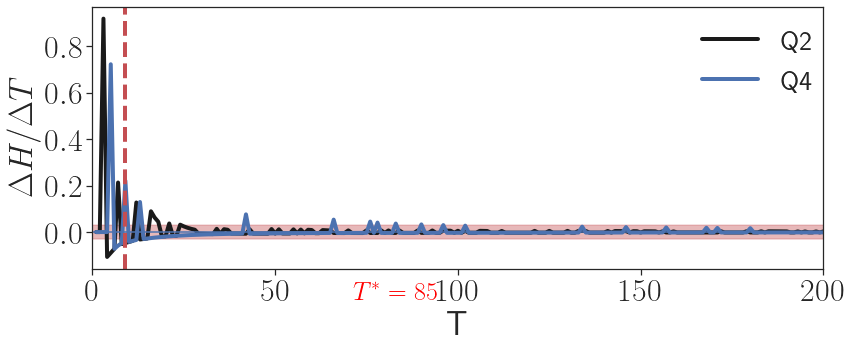

In [194]:
# H vs Reach Plot
import os 
import pandas as pd 
parpath = "Ehsan_shared/ER/T_loop/measure_appr_reach_MoE_and_H_derivatives_added.csv"
df = pd.read_csv(parpath)
df = df[['T_values', 'H_Q1_Derivatives',
       'H_Q2_Derivatives', 'H_Q3_Derivatives', 'H_Q4_Derivatives']]
df.columns = ['T','Q1','Q2','Q3','Q4']
df = df[['T','Q2','Q4']]
opt_T = 85

from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
# plt.style.use('grayscale')
fontsize = 34
labelsize = 26
lw = 4

# lstyles = ['dotted','dashed','dashdot','solid',(0,(5,1)),(0,(1,1)),(0, (3, 5, 1, 5))]
# markers = ['.','s','v','o','<','>', 'D']
markers = [None,None,None,None]
# sns.lineplot(x='T', y='Q1', data=df,marker = markers[0], label = 'Q1', linewidth=lw, markersize=12,color='g')
sns.lineplot(x='T', y='Q2', data=df,marker = markers[1], label = 'Q2', linewidth=lw, markersize=8,color='k')
# sns.lineplot(x='T', y='Q3', data=df,marker = markers[2], label = 'Q3', linewidth=lw, markersize=12,color='r')
sns.lineplot(x='T', y='Q4', data=df,marker = markers[3], label = 'Q4', linewidth=lw, markersize=8,color='b')
x = np.arange(df.shape[0])
zero = np.zeros_like(x)
eps = np.ones_like(x)*0.03
plt.plot(x, zero, 'b-')
plt.fill_between(x, zero - eps, zero + eps, color='r', alpha=0.4)
ax = plt.gca()
ax.axvline(opt-2,linestyle='--',color='r',linewidth=lw)
ax.text(opt_T-2, -.05, '$T^*='+str(opt_T)+'$', color='red', fontsize = fontsize-8, \
        transform=ax.get_xaxis_transform(), ha='center', va='top')
# ax1.axvline(50)

plt.ylabel('$\Delta H/\Delta T$',fontsize=fontsize)
plt.xlabel('T',fontsize=fontsize)
plt.xticks([0,50,100,150,200],fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
plt.xlim((0,200))
plt.legend(loc = 'upper left', fontsize=fontsize+6, bbox_to_anchor=(0.8,1.01),frameon = False,prop={"size":28})
plt.tight_layout()
os.system('mkdir -p figs/')
# plt.savefig('figs/er_appr_reach_TvsDerH.pdf')
plt.show()

In [ ]:
k=1
for i in {0..6}; do 
    K=$((2**i)); 
    python reduce_main.py -k $k  -pr reach  -a greedymem -K $K -ea mcbfs -d ER_15_22 -q data/queries/ER/ER_15_22_2.queries &
    python reduce_main.py -k $k  -pr reach  -a greedymem -K $K -ea exact -d ER_15_22 -q data/queries/ER/ER_15_22_2.queries &
    python reduce_main.py -k $k  -pr reach  -a greedymem -K $K -ea mcbfs -d ER_15_22 -q data/queries/ER/ER_15_22_4.queries &
    python reduce_main.py -k $k  -pr reach  -a greedymem -K $K -ea exact -d ER_15_22 -q data/queries/ER/ER_15_22_4.queries &
done
for i in {0..6}; do 
    K=$((2**i)); 
    python reduce_main.py -k $k -K $K -pr reach -a greedy -ea mcbfs -d ER_15_22 -q data/queries/ER/ER_15_22_2.queries &
    python reduce_main.py -k $k -K $K -pr reach -a greedy -ea exact -d ER_15_22 -q data/queries/ER/ER_15_22_2.queries &
    python reduce_main.py -k $k -K $K -pr reach -a greedy -ea mcbfs -d ER_15_22 -q data/queries/ER/ER_15_22_4.queries &
    python reduce_main.py -k $k -K $K -pr reach -a greedy -ea exact -d ER_15_22 -q data/queries/ER/ER_15_22_4.queries &
done
python reduce_main.py -k $k  -pr reach -a exact -d ER_15_22 -q data/queries/ER/ER_15_22_2.queries &
python reduce_main.py -k $k  -pr reach -a exact -d ER_15_22 -q data/queries/ER/ER_15_22_4.queries &

[241, 483, 966, 1932, 3864, 7728]
241   (5, 15)
483   (5, 15)
966   (5, 15)
1932   (5, 15)
3864   (5, 15)
7728   (5, 15)
0.12500531268978107
[-0.45601169 -0.45601169 -0.45601169 -0.45601169 -0.45601169 -0.45601169]  
  [0.28480131 0.28480131 0.28480131 0.28480131 0.28480131 0.28480131]
[-0.5493497739961013, -0.45639492894137607, -0.5180708372708765, -0.5005233875480541, -0.24420304231847406, -0.2669496636626156] 
 [0.3205111259638518, 0.2851786849437434, 0.30842352792278543, 0.24146217145269308, 0.31573194357993767, 0.270290724834759]
figs/reduce_ER_15_22_reach_budget_2.pdf


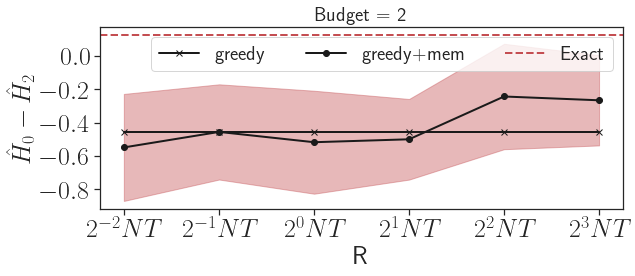

In [115]:
from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
sns.set(rc={'figure.figsize':(9,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
# plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

k = 2
# K = 32
# folder = 'output/baby/ureduct_exact/'
# folder = 'output/baby/ureduce24/'
folder = 'output/baby/reduce_main/'
data = 'ER_15_22'
alg0 = 'greedymem'
a0 = 'greedy+mem'
alg1 = 'greedy'
a1 = 'greedy'
q =   'reach'
# q = 'sp'
qset = 2
# Kset = [1,2,4,8,16,32,64,128,256]
maxR = 4
xlabels = ['$2^{'+str(i)+'}NT$' for i in range(-2,maxR)]
if q == 'reach':
    nt = 161*6
    Kset = [int((2**i)*nt) for i in range(-2,maxR)]
    print(Kset)
if q == 'sp':
    nt = 286*11
    Kset = [int((2**i)*nt) for i in range(-2,maxR)]
varyK0 = [] #greedy+mem
varyK1  = [] #greedy
# est_alg = ['mcbfs','mcdij'][q == 'sp']
est_alg = 'exact'
for K in Kset:
    name0 = folder+'reduce_k_'+str(k)+'_K_'+str(K)+'_'+data+'_'+alg0+'_'+q+'_'+str(qset)+'.queries.csv'
    name1 = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+alg1+'_'+q+'_'+str(qset)+'.queries.csv'
    df0 = pd.read_csv(name0)
    df1 = pd.read_csv(name1)
    df0 = df0[df0['MCalgo'] == est_alg]
    df1 = df1[df1['MCalgo'] == est_alg]
    # df0 = df0[df0['DeltaH']>0]
    # df1 = df1[df1['DeltaH']>0]
    print(K,' ',df0.shape)
    # print(name0,' ',name1)
    varyK0.append(df0)
    varyK1.append(df1)

exactdf = pd.read_csv(folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+'exact_'+q+'_'+str(qset)+'.queries.csv')   
exact_deltaH = exactdf['DeltaH'].mean()
greedy_red = []
greedyM_red = []
std_red = []
stdM_red = []
# init_h = []
# Minit_h = []
for i,K in enumerate(Kset):
    # Minit_h.append(varyK0[i]['H0'].to_list())
    mean,std = varyK0[i]['DeltaH'].mean(), varyK0[i]['DeltaH'].std()
    greedyM_red.append(mean)
    stdM_red.append(std)
    mean,std = varyK1[i]['DeltaH'].mean(), varyK1[i]['DeltaH'].std()
    # init_h.append(varyK1[i]['H0'].to_list())
    greedy_red.append(mean)

    std_red.append(std)
#     sns.lineplot(x='K', y='DeltaH', data=varyK0[i], linewidth=lw, markersize=8,color='k')
# plt.xscale('log',base=2)
greedy_red = np.array(greedy_red)
std_red = np.array(std_red)
# print(greedy_red.shape,' ',std_red.shape,' ',len(greedyM_red),' ',len(stdM_red))
print(exact_deltaH)
print(greedy_red,' \n\r ',std_red)
print(greedyM_red,'\n\r',stdM_red)
# print('H0(greedy) = ',init_h)
# print('H0(greedy+mem) = ',Minit_h)
plt.plot(Kset,greedy_red,color = 'k',marker='x',label='greedy',linewidth=lw)
plt.plot(Kset,greedyM_red,color = 'k',marker='o',label='greedy+mem',linewidth=lw)
plt.fill_between(Kset, np.array(greedyM_red) - np.array(stdM_red), np.array(greedyM_red) + np.array(stdM_red), \
                 color='r', alpha=0.4)
ax = plt.gca()
ax.axhline(exact_deltaH,linestyle='--',color='r',linewidth=lw,label='Exact')

plt.xscale('log',base=2)
plt.xlabel('R',fontsize=fontsize-2)
plt.ylabel('$\hat{H}_0 - \hat{H}_'+str(k)+'$',fontsize=fontsize-2)
# plt.xticks([2**0,2**2,2**4,2**6,2**8],fontsize=fontsize-2)
plt.xticks(Kset,fontsize=fontsize-2)
ax = plt.gca()
ax.set_xticklabels(xlabels)
plt.yticks(fontsize=fontsize-2)
# plt.legend(fontsize=fontsize+10,frameon = False,prop={"size":22},bbox_to_anchor=(0.6,0.4))
# plt.legend(fontsize=fontsize+10,frameon = False,prop={"size":22},bbox_to_anchor=(0.63,0.44))
plt.legend(fontsize=fontsize-8,ncol = 3)
plt.title('Budget = '+str(k),fontsize=fontsize-8)
fname = 'figs/reduce_'+data+"_"+q+'_budget_'+str(k)+".pdf"
print(fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

[241, 483, 966, 1932, 3864, 7728]
output/baby/reduce_main/reduce_k_2_K_10_ER_15_22_exact_reach_2.queries.csv
   source  target   dataset      P algorithm   K        H0  \
0      12       0  ER_15_22  reach    greedy  10  0.098168   
1       7      13  ER_15_22  reach    greedy  10  0.126529   
2      12       5  ER_15_22  reach    greedy  10  0.164900   
3      14       2  ER_15_22  reach    greedy  10  0.057444   
4       3       5  ER_15_22  reach    greedy  10  0.177985   

                       edges        H*  k  execution_time MCalgo    DeltaH  \
0  [('0', '13'), ('0', '7')]  0.777917  2     3464.529058  exact -0.679749   
1  [('0', '13'), ('0', '7')]  0.924819  2     3172.531779  exact -0.798289   
2  [('0', '13'), ('0', '7')]  0.526869  2     4298.029227  exact -0.361969   
3  [('0', '13'), ('0', '7')]  0.141433  2     3522.098221  exact -0.083989   
4  [('0', '13'), ('0', '7')]  0.534047  2     3658.837899  exact -0.356062   

   |DeltaH| history_deltaH  
0  0.679749         

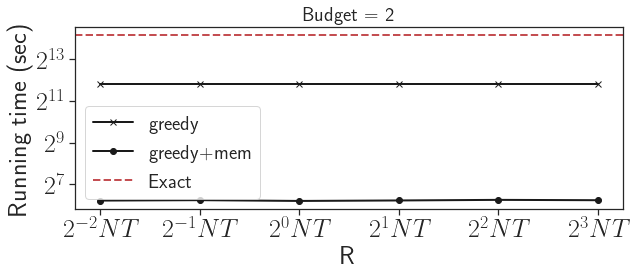

In [114]:
from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(9,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
# plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

k = 2
# K = 32
# folder = 'output/baby/ureduct_exact/'
folder = 'output/baby/reduce_main/'
data = 'ER_15_22'
alg0 = 'greedymem'
a0 = 'greedy+mem'
alg1 = 'greedy'
a1 = 'greedy'
q =   'reach'
# q = 'sp'
qset = 2 
# est_alg = ['mcbfs','mcdij'][q == 'sp']
est_alg = 'exact'
# Kset = [1,2,4,8,16,32,64,128,256]
maxR = 4
xlabels = ['$2^{'+str(i)+'}NT$' for i in range(-2,maxR)]
if q == 'reach':
    nt = 161*6
    Kset = [int((2**i)*nt) for i in range(-2,maxR)]
    print(Kset)
if q == 'sp':
    nt = 286*11
    Kset = [int((2**i)*nt) for i in range(-2,maxR)]
varyK0 = [] #greedy+mem
varyK1  = [] #greedy
# est_alg = ['mcbfs','mcdij'][q == 'sp']
for K in Kset:
    name0 = folder+'reduce_k_'+str(k)+'_K_'+str(K)+'_'+data+'_'+alg0+'_'+q+'_'+str(qset)+'.queries.csv'
    name1 = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+alg1+'_'+q+'_'+str(qset)+'.queries.csv'
    df0 = pd.read_csv(name0)
    df1 = pd.read_csv(name1)
    df0 = df0[df0['MCalgo'] == est_alg]
    df1 = df1[df1['MCalgo'] == est_alg]
    # print(K,' ',df0.shape,' ',df1.shape)
    # print(name0,' ',name1)
    varyK0.append(df0)
    varyK1.append(df1)

exactcsv = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+'exact_'+q+'_'+str(qset)+'.queries.csv'
print(exactcsv)
exactdf = pd.read_csv(exactcsv)   
exact_deltaH = exactdf['execution_time'].mean()
greedy_red = []
greedyM_red = []
std_red = []
stdM_red = []
for i,K in enumerate(Kset):
    mean,std = varyK0[i]['execution_time'].mean(), varyK0[i]['execution_time'].std()
    greedyM_red.append(mean)
    stdM_red.append(std)
    print(varyK1[i])
    mean,std = varyK1[i]['execution_time'].mean(), varyK1[i]['execution_time'].std()
    greedy_red.append(mean)
    std_red.append(std)
#     sns.lineplot(x='K', y='DeltaH', data=varyK0[i], linewidth=lw, markersize=8,color='k')
# plt.xscale('log',base=2)
# greedy_red = np.array(greedy_red)
# std_red = np.array(std_red)
# print(greedy_red.shape,' ',std_red.shape,' ',len(greedyM_red),' ',len(stdM_red))
plt.plot(Kset,greedy_red,color = 'k',marker='x',label='greedy',linewidth=lw)
plt.plot(Kset,greedyM_red,color = 'k',marker='o',label='greedy+mem',linewidth=lw)
# plt.fill_between(Kset, np.array(greedyM_red) - np.array(stdM_red), np.array(greedyM_red) + np.array(stdM_red), \
#                  color='r', alpha=0.4)
ax = plt.gca()
ax.axhline(exact_deltaH,linestyle='--',color='r',linewidth=lw,label='Exact')
plt.yscale('log',base=2)
plt.xscale('log',base=2)
plt.xlabel('R',fontsize=fontsize-2)
plt.ylabel('Running time (sec)',fontsize=fontsize-2)
# plt.xticks([2**0,2**2,2**4,2**6,2**8],fontsize=fontsize-2)
plt.xticks(Kset,fontsize=fontsize-2)
ax = plt.gca()
ax.set_xticklabels(xlabels)
plt.yticks(fontsize=fontsize-2)
# plt.legend(fontsize=fontsize+10,frameon = False,prop={"size":22},bbox_to_anchor=(0.6,0.4))
# plt.legend(fontsize=fontsize+10,frameon = False,prop={"size":22},bbox_to_anchor=(0.63,0.44))
plt.legend(fontsize=fontsize-8)
plt.title('Budget = '+str(k),fontsize=fontsize-8)
fname = 'figs/reduce_'+data+"_"+q+'_budget_'+str(k)+"_time.pdf"
print(fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

[234, 468, 936, 1872, 3744]
234   (10, 15)
468   (10, 15)
936   (10, 15)
1872   (10, 15)
3744   (10, 15)
figs/reduce_restaurants_reach_budget_15.pdf


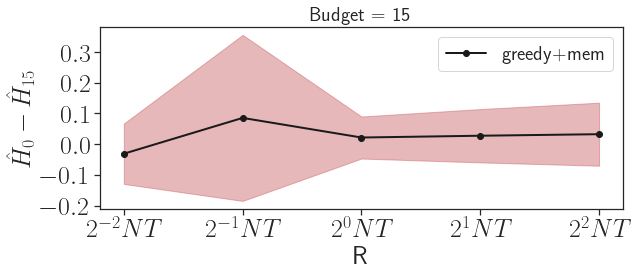

In [128]:
from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
sns.set(rc={'figure.figsize':(9,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
# plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

k = 15
# K = 32
# folder = 'output/baby/ureduct_exact/'
# folder = 'output/baby/ureduce24/'
folder = 'ureduct2/'
# data = 'products'
# nt = 46*4
data = 'restaurants'
nt = 156*6
alg0 = 'greedymem'
a0 = 'greedy+mem'
alg1 = 'greedy'
a1 = 'greedy'
q =   'reach'
# q = 'sp'
qset = 2
# Kset = [1,2,4,8,16,32,64,128,256]
maxR = 3
xlabels = ['$2^{'+str(i)+'}NT$' for i in range(-2,maxR)]
if q == 'reach':
    # nt = 161*6
    Kset = [int((2**i)*nt) for i in range(-2,maxR)]
    print(Kset)
if q == 'sp':
    # nt = 286*11
    Kset = [int((2**i)*nt) for i in range(-2,maxR)]
varyK0 = [] #greedy+mem
varyK1  = [] #greedy
# est_alg = ['mcbfs','mcdij'][q == 'sp']
est_alg = 'mcbfs'
for K in Kset:
    name0 = folder+'reduce_k_'+str(k)+'_K_'+str(K)+'_'+data+'_'+alg0+'_'+q+'_'+str(qset)+'.queries.csv'
    # name1 = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+alg1+'_'+q+'_'+str(qset)+'.queries.csv'
    df0 = pd.read_csv(name0)
    # df1 = pd.read_csv(name1)
    df0 = df0[df0['MCalgo'] == est_alg]
    # df1 = df1[df1['MCalgo'] == est_alg]
    # df0 = df0[df0['DeltaH']>0]
    # df1 = df1[df1['DeltaH']>0]
    print(K,' ',df0.shape)
    # print(name0,' ',name1)
    varyK0.append(df0)
    # varyK1.append(df1)

# exactdf = pd.read_csv(folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+'exact_'+q+'_'+str(qset)+'.queries.csv')   
# exact_deltaH = exactdf['DeltaH'].mean()
greedy_red = []
greedyM_red = []
std_red = []
stdM_red = []
# init_h = []
# Minit_h = []
for i,K in enumerate(Kset):
    # Minit_h.append(varyK0[i]['H0'].to_list())
    mean,std = varyK0[i]['DeltaH'].mean(), varyK0[i]['DeltaH'].std()
    greedyM_red.append(mean)
    stdM_red.append(std)
    # mean,std = varyK1[i]['DeltaH'].mean(), varyK1[i]['DeltaH'].std()
    # init_h.append(varyK1[i]['H0'].to_list())
    # greedy_red.append(mean)

    # std_red.append(std)
#     sns.lineplot(x='K', y='DeltaH', data=varyK0[i], linewidth=lw, markersize=8,color='k')
# plt.xscale('log',base=2)
# greedy_red = np.array(greedy_red)
# std_red = np.array(std_red)
# # print(greedy_red.shape,' ',std_red.shape,' ',len(greedyM_red),' ',len(stdM_red))
# print(exact_deltaH)
# print(greedy_red,' \n\r ',std_red)
# print(greedyM_red,'\n\r',stdM_red)
# print('H0(greedy) = ',init_h)
# print('H0(greedy+mem) = ',Minit_h)
# plt.plot(Kset,greedy_red,color = 'k',marker='x',label='greedy',linewidth=lw)
plt.plot(Kset,greedyM_red,color = 'k',marker='o',label='greedy+mem',linewidth=lw)
plt.fill_between(Kset, np.array(greedyM_red) - np.array(stdM_red), np.array(greedyM_red) + np.array(stdM_red), \
                 color='r', alpha=0.4)
# ax = plt.gca()
# ax.axhline(exact_deltaH,linestyle='--',color='r',linewidth=lw,label='Exact')

plt.xscale('log',base=2)
plt.xlabel('R',fontsize=fontsize-2)
plt.ylabel('$\hat{H}_0 - \hat{H}_{'+str(k)+'}$',fontsize=fontsize-2)
# plt.xticks([2**0,2**2,2**4,2**6,2**8],fontsize=fontsize-2)
plt.xticks(Kset,fontsize=fontsize-2)
ax = plt.gca()
ax.set_xticklabels(xlabels)
plt.yticks(fontsize=fontsize-2)
# plt.legend(fontsize=fontsize+10,frameon = False,prop={"size":22},bbox_to_anchor=(0.6,0.4))
# plt.legend(fontsize=fontsize+10,frameon = False,prop={"size":22},bbox_to_anchor=(0.63,0.44))
plt.legend(fontsize=fontsize-8,ncol = 3)
plt.title('Budget = '+str(k),fontsize=fontsize-8)
fname = 'figs/reduce_'+data+"_"+q+'_budget_'+str(k)+".pdf"
print(fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

64   (100, 16)   (100, 16)
128   (100, 16)   (100, 16)
256   (90, 16)   (100, 16)
512   (100, 16)   (78, 16)
1024   (51, 16)   (65, 16)
figs/reduce_papers_reach_budget_2.pdf


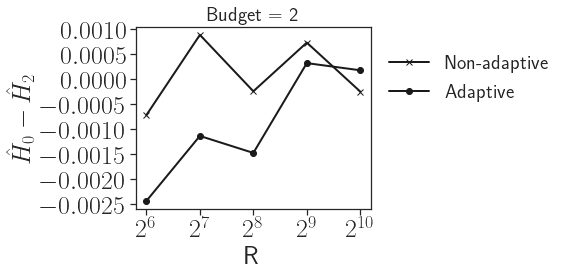

In [214]:
from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
# plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

k = 2
# K = 32
data = 'papers'
alg0 = 'greedymem'
a0 = 'greedy+mem'
q = 'reach'
qset = 2 
Kset = [64,128,256,512,1024]
varyK0 = [] #greedy+mem
varyK1  = [] #greedy
est_alg = 'mcbfs'
for K in Kset:
    name0 = 'CRureduct/reduce_k_'+str(k)+'_K_'+str(K)+'_'+data+'_'+alg0+'_'+q+'_'+str(qset)+'.queries.csv'
    df0 = pd.read_csv(name0)
    df0 = df0[df0['MCalgo'] == est_alg]
    df1= df0[df0['setting'] == 'adaptive']
    df0 = df0[df0['setting'] == 'non-adaptive']
    print(K,' ',df0.shape,' ',df1.shape)
    varyK0.append(df0)
    varyK1.append(df1)


adap = []
non_adap = []
# std_red = []
# stdM_red = []
for i,K in enumerate(Kset):
    mean,std = varyK0[i]['DeltaH'].mean(), varyK0[i]['DeltaH'].std()
    non_adap.append(mean)
    # stdM_red.append(std)
    mean,std = varyK1[i]['DeltaH'].mean(), varyK1[i]['DeltaH'].std()
    adap.append(mean)
    # std_red.append(std)
#     sns.lineplot(x='K', y='DeltaH', data=varyK0[i], linewidth=lw, markersize=8,color='k')
# plt.xscale('log',base=2)
non_adap = np.array(non_adap)
adap = np.array(adap)
plt.plot(Kset,non_adap,color = 'k',marker='x',label='Non-adaptive',linewidth=lw)
plt.plot(Kset,adap,color = 'k',marker='o',label='Adaptive',linewidth=lw)
# plt.fill_between(Kset, np.array(greedyM_red) - np.array(stdM_red), np.array(greedyM_red) + np.array(stdM_red), \
#                  color='r', alpha=0.4)
# ax = plt.gca()
# ax.axhline(exact_deltaH,linestyle='--',color='r',linewidth=lw,label='Exact')

plt.xscale('log',base=2)
plt.xlabel('R',fontsize=fontsize-2)
plt.ylabel('$\hat{H}_0 - \hat{H}_'+str(k)+'$',fontsize=fontsize-2)
plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
plt.legend(fontsize=fontsize+10,bbox_to_anchor=(1.001,0.95),frameon = False,prop={"size":20})
plt.title('Budget = '+str(k),fontsize=fontsize-8)
fname = 'figs/reduce_'+data+"_"+q+'_budget_'+str(k)+".pdf"
print(fname)
plt.tight_layout()
plt.savefig(fname)

[1, 9, 17, 25, 33]
R =  3744
1  non-ad:  (7, 16)  ad:  (3, 16)
9  non-ad:  (4, 16)  ad:  (10, 16)
17  non-ad:  (7, 16)  ad:  (10, 16)
25  non-ad:  (10, 16)  ad:  (10, 16)
33  non-ad:  (3, 16)  ad:  (10, 16)
figs/varyk_restaurants_reach_Q2_budget_4NT.pdf


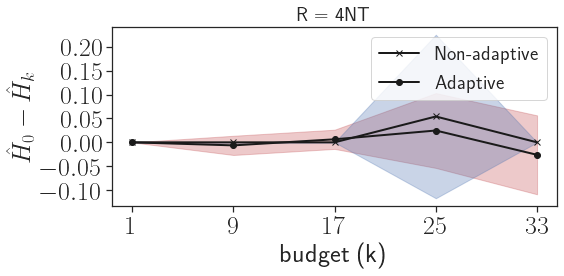

In [90]:
from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
# plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

# folder = 'output/baby/CRureduct2/'
folder = 'output/baby/CR_rest/'

# K = 32
data = 'restaurants'
# data = 'products'
alg0 = 'greedymem'
a0 = 'greedy+mem'
q = 'reach'
qset = 2
# kset = [2,3,5]
ignore_negative = False
# kset = [list(range(1,851,85*2)),list(range(1,376,2*37))][data=='products']
kset = [list(range(1,35,8)),list(range(1,37,6))][data=='products']
print(kset)
# Kset = [64,128,256,512,1024]
# K = [2*156*6,2*4*46][data=='products']
multiplier = 4
K = [int(multiplier*156*6),int(multiplier*4*46)][data=='products']
NT = str(multiplier)+'NT'
print('R = ',K)
varyK0 = [] #greedy+mem
varyK1  = [] #greedy
est_alg = 'mcbfs'
for k in kset:
    name0 = folder+'reduce_k_'+str(k)+'_K_'+str(K)+'_'+data+'_'+alg0+'_'+q+'_'+str(qset)+'.queries.csv'
    df0 = pd.read_csv(name0)
    df0 = df0[df0['MCalgo'] == est_alg]
    df1= df0[df0['setting'] == 'adaptive']
    df0 = df0[df0['setting'] == 'non-adaptive']
    if ignore_negative:
        df0 = df0[df0['DeltaH']>0]
        df1 = df1[df1['DeltaH']>0]
    print(k,' non-ad: ',df0.shape,' ad: ',df1.shape)
    varyK0.append(df0)
    varyK1.append(df1)


adap = []
non_adap = []
std_ad = []
std_nad = []
for i,K in enumerate(kset):
    mean,std = varyK0[i]['DeltaH'].mean(), varyK0[i]['DeltaH'].std()
    non_adap.append(mean)
    std_nad.append(std)
    mean,std = varyK1[i]['DeltaH'].mean(), varyK1[i]['DeltaH'].std()
    adap.append(mean)
    std_ad.append(std)
#     sns.lineplot(x='K', y='DeltaH', data=varyK0[i], linewidth=lw, markersize=8,color='k')
# plt.xscale('log',base=2)
non_adap = np.array(non_adap)
adap = np.array(adap)
std_ad = np.array(std_ad)
std_nad = np.array(std_nad)
plt.plot(kset,non_adap,color = 'k',marker='x',label='Non-adaptive',linewidth=lw)
plt.plot(kset,adap,color = 'k',marker='o',label='Adaptive',linewidth=lw)
plt.fill_between(kset, adap - std_ad, adap + std_ad, \
                 color='r', alpha=0.3)
plt.fill_between(kset, non_adap - std_nad, non_adap + std_nad, \
                 color='b', alpha=0.3)
# ax = plt.gca()
# ax.axhline(exact_deltaH,linestyle='--',color='r',linewidth=lw,label='Exact')

# plt.xscale('log',base=2)
plt.xlabel('budget (k)',fontsize=fontsize-2)
plt.ylabel('$\hat{H}_0 - \hat{H}_k$',fontsize=fontsize-2)
plt.xticks(kset,fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
# plt.legend(fontsize=fontsize+10,bbox_to_anchor=(1.001,0.95),frameon = False,prop={"size":20})
plt.legend(fontsize=fontsize+10,loc='best',prop={"size":20})
plt.title('R = '+NT,fontsize=fontsize-8)
fname = 'figs/varyk_'+data+"_"+q+'_Q'+str(qset)+'_budget_'+NT+".pdf"
print(fname)
plt.tight_layout()
plt.savefig(fname)

1   (10, 16)   (10, 16)
171   (10, 16)   (0, 16)
341   (10, 16)   (0, 16)
511   (10, 16)   (0, 16)
681   (10, 16)   (0, 16)
figs/varyk_restaurants_reach_budget_681_tm.pdf


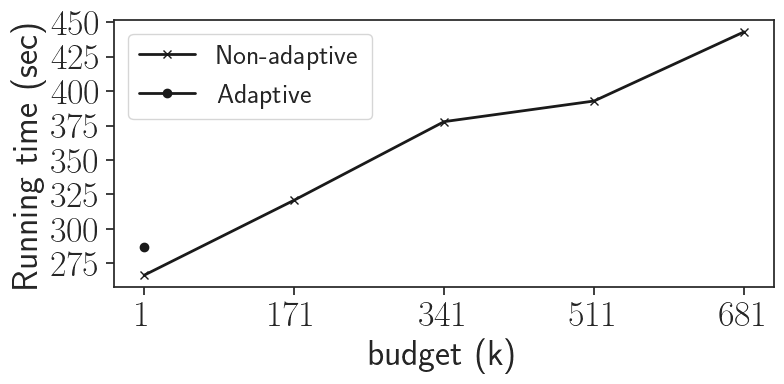

In [23]:
from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
# plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

folder = 'output/baby/CRureduct/'

# K = 32
data = 'restaurants'
# data = 'products'
alg0 = 'greedymem'
a0 = 'greedy+mem'
q = 'reach'
qset = 2 
# kset = [2,3,5]

kset = [list(range(1,851,85*2)),list(range(1,376,2*37))][data=='products']
# Kset = [64,128,256,512,1024]
K = [156*6,4*46][data=='products']
varyK0 = [] #greedy+mem
varyK1  = [] #greedy
est_alg = 'mcbfs'
for k in kset:
    name0 = folder+'reduce_k_'+str(k)+'_K_'+str(K)+'_'+data+'_'+alg0+'_'+q+'_'+str(qset)+'.queries.csv'
    df0 = pd.read_csv(name0)
    df0 = df0[df0['MCalgo'] == est_alg]
    df1= df0[df0['setting'] == 'adaptive']
    df0 = df0[df0['setting'] == 'non-adaptive']
    print(k,' ',df0.shape,' ',df1.shape)
    varyK0.append(df0)
    varyK1.append(df1)


adap = []
non_adap = []
# std_red = []
# stdM_red = []
for i,K in enumerate(kset):
    mean,std = varyK0[i]['execution_time'].mean(), varyK0[i]['execution_time'].std()
    non_adap.append(mean)
    # stdM_red.append(std)
    mean,std = varyK1[i]['execution_time'].mean(), varyK1[i]['execution_time'].std()
    adap.append(mean)
    # std_red.append(std)
#     sns.lineplot(x='K', y='DeltaH', data=varyK0[i], linewidth=lw, markersize=8,color='k')
# plt.xscale('log',base=2)
non_adap = np.array(non_adap)
adap = np.array(adap)
plt.plot(kset,non_adap,color = 'k',marker='x',label='Non-adaptive',linewidth=lw)
plt.plot(kset,adap,color = 'k',marker='o',label='Adaptive',linewidth=lw)
# plt.fill_between(Kset, np.array(greedyM_red) - np.array(stdM_red), np.array(greedyM_red) + np.array(stdM_red), \
#                  color='r', alpha=0.4)
# ax = plt.gca()
# ax.axhline(exact_deltaH,linestyle='--',color='r',linewidth=lw,label='Exact')

# plt.xscale('log',base=2)
plt.xlabel('budget (k)',fontsize=fontsize-2)
plt.ylabel('Running time (sec)',fontsize=fontsize-2)
plt.xticks(kset,fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
plt.legend(fontsize=fontsize+10,loc='best',prop={"size":20})
# plt.title('Budget = '+str(k),fontsize=fontsize-8)
fname = 'figs/varyk_'+data+"_"+q+'_budget_'+str(K)+"_tm.pdf"
print(fname)
plt.tight_layout()
plt.savefig(fname)

In [1]:
from src import utils
d = 'biomine'
# d = 'ER_15_22'
qset = 4
# maxT = 20
maxT = 201

# qf = 'data/queries/ER/ER_15_22_'+str(qset)+'.queries'
qf = 'data/queries/'+d+'/'+d+'_'+str(qset)+'.queries'
queries = utils.get_queries(qf,maxQ=10)
cmds = []
for u,v in queries:
    st = 'python3 measure_main.py -a mcdij -pr sp -s '+str(u) +' -t '+str(v)+ ' -N '+str(maxT)+' -T 11'+' -d '+d+' -q '+qf+' -pre 1 &'
    cmds.append(st)
for i in cmds:
    print(i)

pre = 'for ((i='+str(maxT-5)+'; i>=1; i=i-5)); do '
post = '; done'
cmd2 = []
# for u,v in queries:
#     st = pre+'python3 measure_main.py -a mcdij -pr sp -s '+str(u) +' -t '+str(v)+ ' -N $i -T 11 -d '+d+' -q '+qf+' -pre 1'+post+' &'
#     cmd2.append(st)
st = pre+'python3 measure_main.py -a mcdij -pr sp -N $i -T 11 -d '+d+' -q '+qf+' -pre 1 -mq 10'+post+' &'


print('-----------')
# for i in cmd2:
#     print(i)
print(st)

python3 measure_main.py -a mcdij -pr sp -s 711794 -t 835611 -N 201 -T 11 -d biomine -q data/queries/biomine/biomine_4.queries -pre 1 &
python3 measure_main.py -a mcdij -pr sp -s 316609 -t 744327 -N 201 -T 11 -d biomine -q data/queries/biomine/biomine_4.queries -pre 1 &
python3 measure_main.py -a mcdij -pr sp -s 644474 -t 555241 -N 201 -T 11 -d biomine -q data/queries/biomine/biomine_4.queries -pre 1 &
python3 measure_main.py -a mcdij -pr sp -s 802118 -t 680357 -N 201 -T 11 -d biomine -q data/queries/biomine/biomine_4.queries -pre 1 &
python3 measure_main.py -a mcdij -pr sp -s 169172 -t 744344 -N 201 -T 11 -d biomine -q data/queries/biomine/biomine_4.queries -pre 1 &
python3 measure_main.py -a mcdij -pr sp -s 921969 -t 2169 -N 201 -T 11 -d biomine -q data/queries/biomine/biomine_4.queries -pre 1 &
python3 measure_main.py -a mcdij -pr sp -s 1177 -t 818281 -N 201 -T 11 -d biomine -q data/queries/biomine/biomine_4.queries -pre 1 &
python3 measure_main.py -a mcdij -pr sp -s 504101 -t 645398

In [131]:
import os
folder = 'data/maniu/biomine_4_subg/'
counts = []
for file in os.listdir(folder):
    f = os.path.join(folder,file)
    with open(f,'r') as f:
        count = 0
        for i in f:
            count+=1
    counts.append(count)


In [132]:
np.array(counts).mean()

12229597.8

In [172]:
12229597.8/13485878

0.9068447601261113

In [18]:
from src.utils import *
import networkx as nx
datasets = ['restaurants','papers','products']
for d in datasets:
    g = get_dataset(d).get_unweighted_graph_rep()
    num_tri = sum(nx.triangles(g).values()) / 3
    print(d,' => ',num_tri)

weighted graph? =>  False
restaurants  =>  6006094.0
weighted graph? =>  False
papers  =>  11705858.0
weighted graph? =>  False
products  =>  0.0


In [112]:
import numpy as np 
import networkx as nx
# probs = [0.04789901, 0.09363531, 0.14083636, 0.05267808, 0.06782982,\
#           0.15798337, 0.14940544, 0.06574165, 0.10425499, 0.06961062,\
#               0.18958358, 0.08923455, 0.05787994, 0.01175601,\
#                   0.23236675, 0.06718671]
for i in range(2,10):
    n = 10
    m = 16
    mu = 0.09
    sigma = 0.06
    # g = nx.barabasi_albert_graph(n,m, seed = i)
    g = nx.watts_strogatz_graph(n, 6, 0.9, seed=i)
    num_tri = sum(nx.triangles(g).values()) / 3
    print(d,' => ',num_tri)
    print(len(g.edges),' ',len(g.nodes))
    M = len(g.edges)
    while True:
        probs = np.random.normal(mu, sigma, M)
        if sum(probs<0) == 0:
            print('Empirical mu = ',np.mean(probs),' std = ',np.std(probs))
            break
    for j,(source,target) in enumerate(g.edges):
        weight = probs[j]
        g[source][target]['weight'] = weight
    # nx.write_weighted_edgelist(g,'BA_20_16_seed_'+str(i)+'.graph')
    nx.write_weighted_edgelist(g,'WA_'+str(len(g.nodes))+'_'+str(len(g.edges))+'_seed_'+str(i)+'.graph')
    break
    # prob = np.random.normal(mu, sigma, m)
    # negatives = sum(prob<0)
    # print(prob, ' ',negatives,' mean= ',np.mean(prob),' sigma: ',np.std(prob))

products  =>  33.0
30   10
Empirical mu =  0.10082351739650205  std =  0.054440814280226464


3   (5, 17)   (5, 15)   (5, 14)
4   (5, 17)   (5, 15)   (5, 14)
5   (1, 17)   (5, 15)   (0, 0)
   k  greedy+struct  greedy     exact
0  3       0.585817     0.0  0.585817
1  4       0.518665     0.0  0.518665
2  5       0.074645     0.0       NaN
figs/reduce_ER_15_22_reach.pdf


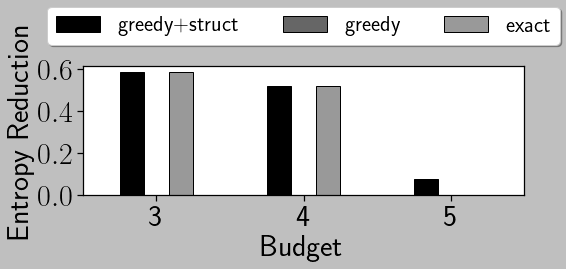

In [190]:
from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 32
labelsize = 24
lw = 2

# folder = 'reduce_mainP/'
folder = '7_3_1/'
data = 'ER_15_22'
alg0 = 'greedyp'
a0 = 'greedyp'
alg1 = 'greedy'
a1 = 'greedy'
q =   'reach'
# q = 'sp'

# 'mcdij' #'mcbfs' #
est_alg = 'exact'
# est_alg = 'mcbfs'
# kset = [3,4,5]
kset = [3,4,5]
varyK0 = [] #greedy+struct
varyK1  = [] #greedy
exact = [] 
# est_alg = ['mcbfs','mcdij'][q == 'sp']
for k in kset:
    # qset = str(k)
    qset = 4
    name0 = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+alg0+'_'+q+'_'+str(qset)+'.queries.csv'
    name1 = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+alg1+'_'+q+'_'+str(qset)+'.queries.csv'
    df0 = pd.read_csv(name0)
    df1 = pd.read_csv(name1)
    df0 = df0[df0['MCalgo'] == est_alg]
    df1 = df1[df1['MCalgo'] == est_alg]
    
    # if k==4:
    #     df0 = df0.iloc[0]
    #     df1=df1.iloc[0]
    # print(name0,' ',name1)
    varyK0.append(df0)
    varyK1.append(df1)

    try:
        exactcsv = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+'exact_'+q+'_'+str(qset)+'.queries.csv'
        exactdf = pd.read_csv(exactcsv) 
    except:
        exactdf = pd.DataFrame()  
    exact.append(exactdf)
    print(k,' ',df0.shape,' ',df1.shape,' ',exactdf.shape)

exact_red = []
stde_red = []
greedy_red = []
greedyp_red = []
std_red = []
stdp_red = []
for i,K in enumerate(kset):
    mean,std = varyK0[i]['DeltaH'].mean(), varyK0[i]['DeltaH'].std()
    greedyp_red.append(mean)
    stdp_red.append(std)
    
    mean,std = varyK1[i]['DeltaH'].mean(), varyK1[i]['DeltaH'].std()
    greedy_red.append(mean)
    std_red.append(std)

    try:
        mean,std = exact[i]['DeltaH'].mean(), exact[i]['DeltaH'].std()
    except:
        mean,std = None,None 
    exact_red.append(mean)
    stde_red.append(std)

df = pd.DataFrame(zip(kset,greedyp_red,greedy_red,exact_red),columns = ['k','greedy+struct','greedy','exact'])
print(df.head())
ax = df.plot(x="k", y=["greedy+struct","greedy","exact"], kind="bar",rot=0)
# plt.yscale('log',base=10)
# plt.bar(kset,greedyp_red)
# #     sns.lineplot(x='K', y='DeltaH', data=varyK0[i], linewidth=lw, markersize=8,color='k')
# # plt.xscale('log',base=2)
# # greedy_red = np.array(greedy_red)
# # std_red = np.array(std_red)
# # print(greedy_red.shape,' ',std_red.shape,' ',len(greedyM_red),' ',len(stdM_red))
# plt.plot(Kset,greedy_red,color = 'k',marker='x',label='greedy',linewidth=lw)
# plt.plot(Kset,greedyM_red,color = 'k',marker='o',label='greedy+mem',linewidth=lw)
# # plt.fill_between(Kset, np.array(greedyM_red) - np.array(stdM_red), np.array(greedyM_red) + np.array(stdM_red), \
# #                  color='r', alpha=0.4)
# ax = plt.gca()
# ax.axhline(exact_deltaH,linestyle='--',color='r',linewidth=lw,label='Exact')
# plt.yscale('log',base=2)
# plt.xscale('log',base=2)
plt.xlabel('Budget', fontsize=fontsize-2)
plt.ylabel('Entropy Reduction',fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
# plt.yticks([0,0.05,0.1,0.16],fontsize=fontsize-2)
plt.xticks(fontsize=fontsize-2)
# plt.yscale('log')
# ax = plt.gca()
# ax.set_xticklabels(xlabels)
# plt.yticks(fontsize=fontsize-2)
# # plt.legend(fontsize=fontsize+10,frameon = False,prop={"size":22},bbox_to_anchor=(0.6,0.4))
# plt.legend(fontsize=fontsize-7, ncol = 3)
# plt.legend(fontsize=fontsize-3)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.08),\
          ncol=3, fancybox=True, shadow=True,fontsize=labelsize-2)
# plt.title('Budget = '+str(k),fontsize=fontsize-8)
fname = 'figs/reduce_'+data+"_"+q+".pdf"
print(fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

3   (5, 17)   (5, 15)   (1, 14)
4   (5, 17)   (5, 15)   (1, 14)
5   (5, 17)   (5, 15)   (0, 0)
   k  greedy+struct       greedy         exact
0  3     225.619456  6033.749902  146253.07710
1  4      75.993684  7777.631171  556970.29624
2  5      73.582189  9442.318597           NaN
figs/reduce_ER_15_22_sp_time.pdf


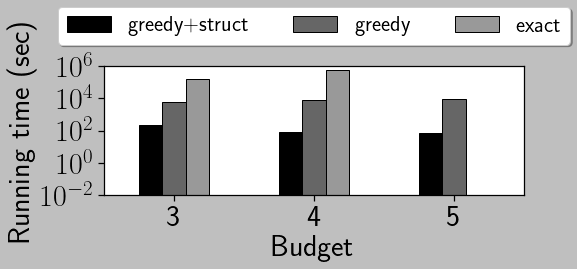

In [175]:
from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 32
labelsize = 24
lw = 2

folder = '7_3_1/'
data = 'ER_15_22'
alg0 = 'greedyp'
a0 = 'greedyp'
alg1 = 'greedy'
a1 = 'greedy'
# q =   'reach'
q = 'sp'

est_alg = 'exact'
kset = [3, 4, 5]
varyK0 = [] #greedy+struct
varyK1  = [] #greedy
exact = []
# est_alg = ['mcbfs','mcdij'][q == 'sp']
for k in kset:
    qset = str(4)
    name0 = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+alg0+'_'+q+'_'+str(qset)+'.queries.csv'
    name1 = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+alg1+'_'+q+'_'+str(qset)+'.queries.csv'
    df0 = pd.read_csv(name0)
    df1 = pd.read_csv(name1)
    df0 = df0[df0['MCalgo'] == est_alg]
    df1 = df1[df1['MCalgo'] == est_alg]
    
    # print(name0,' ',name1)
    varyK0.append(df0)
    varyK1.append(df1)
    try:
        exactcsv = folder+'reduce_k_'+str(k)+'_K_10_'+data+'_'+'exact_'+q+'_'+str(qset)+'.queries.csv'
        exactdf = pd.read_csv(exactcsv)   
    except:
        exactdf = pd.DataFrame()  
    exact.append(exactdf)
    print(k,' ',df0.shape,' ',df1.shape,' ',exactdf.shape)
        
exact_red = []
stde_red = []
greedy_red = []
greedyp_red = []
std_red = []
stdp_red = []
for i,K in enumerate(kset):
    mean,std = varyK0[i]['execution_time'].mean(), varyK0[i]['execution_time'].std()
    greedyp_red.append(mean)
    stdp_red.append(std)
    
    mean,std = varyK1[i]['execution_time'].mean(), varyK1[i]['execution_time'].std()
    greedy_red.append(mean)
    std_red.append(std)

    if len(exact[i])>0:
        mean,std = exact[i]['execution_time'].mean(), exact[i]['execution_time'].std()
    else:
        mean,std = None,None
    exact_red.append(mean)
    stde_red.append(std)

df = pd.DataFrame(zip(kset,greedyp_red,greedy_red,exact_red),columns = ['k','greedy+struct','greedy','exact'])
print(df.head())
ax = df.plot(x="k", y=["greedy+struct","greedy","exact"], kind="bar",rot=0)
plt.yscale('log',base=10)
# plt.bar(kset,greedyp_red)
# #     sns.lineplot(x='K', y='DeltaH', data=varyK0[i], linewidth=lw, markersize=8,color='k')
# # plt.xscale('log',base=2)
# # greedy_red = np.array(greedy_red)
# # std_red = np.array(std_red)
# # print(greedy_red.shape,' ',std_red.shape,' ',len(greedyM_red),' ',len(stdM_red))
# plt.plot(Kset,greedy_red,color = 'k',marker='x',label='greedy',linewidth=lw)
# plt.plot(Kset,greedyM_red,color = 'k',marker='o',label='greedy+mem',linewidth=lw)
# # plt.fill_between(Kset, np.array(greedyM_red) - np.array(stdM_red), np.array(greedyM_red) + np.array(stdM_red), \
# #                  color='r', alpha=0.4)
# ax = plt.gca()
# ax.axhline(exact_deltaH,linestyle='--',color='r',linewidth=lw,label='Exact')
# plt.yscale('log',base=2)
# plt.xscale('log',base=2)
plt.xlabel('Budget', fontsize=fontsize-2)
plt.ylabel('Running time (sec)',fontsize=fontsize-2)
plt.yticks([10**-2,10**0, 10**2,10**4, 10**6],fontsize=fontsize-2)
plt.xticks(fontsize=fontsize-2)
# ax = plt.gca()
# ax.set_xticklabels(xlabels)
# plt.yticks(fontsize=fontsize-2)
# # plt.legend(fontsize=fontsize+10,frameon = False,prop={"size":22},bbox_to_anchor=(0.6,0.4))
# plt.legend(fontsize=fontsize-7, ncol = 3)
# plt.legend(fontsize=fontsize)
# plt.title('Budget = '+str(k),fontsize=fontsize-8)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.08),\
          ncol=3, fancybox=True, shadow=True,fontsize=labelsize-2)
fname = 'figs/reduce_'+data+"_"+q+"_time.pdf"
print(fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

# Large dataset Budget vs Reduction

range(1, 6)
1   (500, 17)
2   (500, 17)
3   (500, 17)
4   (500, 17)
5   (260, 17)
total queries =  (2260, 17)
r
1    452
2    452
3    452
4    452
5    452
Name: DeltaH, dtype: int64


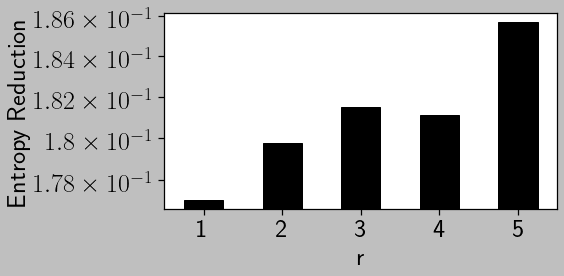

In [101]:
from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

# folder = 'output/baby/CRureduct2/'
folder = 'p/reduce_main/'

# K = 32
data = 'restaurants'
# data = 'papers'
# data = 'products'
alg0 = 'greedyp'
a0 = 'greedyp'
q = 'reach'
if data == 'products':
    qset = range(1,9)
elif data=='restaurants' or data == 'papers':
    qset = range(1,6)
print(qset)
varyK0 = [] #non-ada
est_alg = 'mcbfs'
ignore_negative = False
for k in qset:
    name0 = folder+'reduce_k_100_K_10_'+data+'_'+alg0+'_'+q+'_'+str(k)+'.queries.csv'
    df0 = pd.read_csv(name0)
    # df0 = df0[df0['r']<10]
    # print(df0['H0'])
    # df0 = df0[df0['H0'].astype(float)>0]
    df0 = df0[df0['MCalgo'] == est_alg]
    # df1= df0[df0['setting'] == 'adaptive']
    # df0 = df0[df0['setting'] == 'non-adaptive']
    if ignore_negative:
        df0 = df0[df0['DeltaH']>0]
        # df1 = df1[df1['DeltaH']>0]
    # df0 = df0[df0['H0'].values >0]
    # df1 = df1[df1['H0'].values >0]
    # try:
    #     df0 = df0[df0['H0']>0]
    #     df1 = df1[df1['H0']>0]
    # except:
    #     print(df0['H0'].astype(float).values)
    #     raise Exception
    print(k,' ',df0.shape)
    varyK0.append(df0)
    # varyK1.append(df1)

df0 = pd.concat(varyK0) # non-ada
print('total queries = ',df0.shape)
print(df0.groupby('r')['DeltaH'].count())
# H0 = df0['H0'].median()
# print('H0 = ',H0)
# df1 = pd.concat(varyK1) # ada
# print(df1.groupby('r')['DeltaH'].count())
final_df = pd.DataFrame(df0.groupby('r')['DeltaH'].mean()).reset_index()
final_df = final_df.rename(columns={"r": "r", "DeltaH": "Entropy Reduction"})
# final_df['Adaptive'] = df1.groupby('r')['DeltaH'].mean().values
final_df['r'] = final_df['r'].astype(int)
# print(final_df)
ax = final_df.plot(x="r", y=["Entropy Reduction"], kind="bar",rot=0,legend=None)
plt.yscale('log',base=10)
plt.yticks([0.178,0.18,0.182,0.184,0.186],fontsize=fontsize-2)
plt.xticks(fontsize=fontsize-2)
plt.xlabel('r', fontsize=fontsize-2)
plt.ylabel('Entropy Reduction',fontsize=fontsize-2)
# plt.show()
# plt.yticks([0.1,0.13,0.16,0.19],fontsize=fontsize-2)
# # plt.legend(fontsize=fontsize+10,bbox_to_anchor=(1.001,0.95),frameon = False,prop={"size":20})
# plt.legend(fontsize=fontsize,loc='best',prop={"size":20})
# plt.title('R = '+NT,fontsize=fontsize-8)
fname = 'figs/varyk_'+data+"_"+q+'_budgetvsdelH.pdf'
# print(fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

# Adaptive vs non-adaptive

range(1, 6)
1  non-ad:  (5, 18)  ad:  (5, 18)
2  non-ad:  (7, 18)  ad:  (6, 18)
3  non-ad:  (45, 18)  ad:  (11, 18)
4  non-ad:  (26, 18)  ad:  (97, 18)
5  non-ad:  (75, 18)  ad:  (81, 18)
total queries =  (158, 18)
r
1    82
2    68
3     8
Name: DeltaH, dtype: int64
r
1    126
2     62
3     12
Name: DeltaH, dtype: int64
   r  Non-adaptive  Adaptive   ada_err  nonada_err
0  1      0.210370  0.243179  0.130712    0.156783
1  2      0.229557  0.223032  0.132385    0.137752
2  3      0.222263  0.182712  0.094478    0.094238


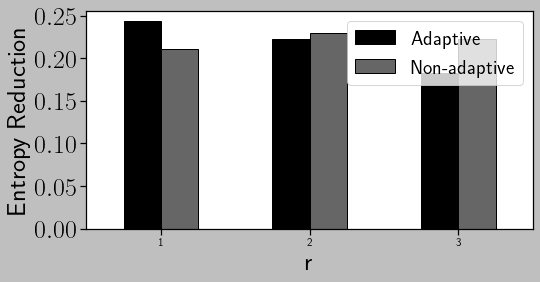

In [139]:
from matplotlib import pyplot as plt 
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

# folder = 'output/baby/CRureduct2/'
folder = 'p/CRureduct/'

# K = 32
# data = 'papers'
data = 'restaurants'
# data = 'products'
alg0 = 'greedyp'
a0 = 'greedyp'
q = 'reach'
qset = range(1,6)
print(qset)
varyK0 = [] #non-ada
varyK1  = [] #ada
est_alg = 'appr' # 'mcbfs'
ignore_negative = True
for k in qset:
    name0 = folder+'reduce_k_100_K_10_'+data+'_'+alg0+'_'+q+'_'+str(k)+'.queries.csv'
    df0 = pd.read_csv(name0)
    df0 = df0[df0['r']<10]
    # print(df0['H0'])
    # df0 = df0[df0['H0'].astype(float)>0]
    df0 = df0[df0['MCalgo'] == est_alg]
    df1= df0[df0['setting'] == 'adaptive']
    df0 = df0[df0['setting'] == 'non-adaptive']
    if ignore_negative:
        df0 = df0[df0['DeltaH']>0]
        df1 = df1[df1['DeltaH']>0]
    df0 = df0[df0['H0'].values >0]
    df1 = df1[df1['H0'].values >0]
    # try:
    #     df0 = df0[df0['H0']>0]
    #     df1 = df1[df1['H0']>0]
    # except:
    #     print(df0['H0'].astype(float).values)
    #     raise Exception
    print(k,' non-ad: ',df0.shape,' ad: ',df1.shape)
    varyK0.append(df0)
    varyK1.append(df1)

df0 = pd.concat(varyK0) # non-ada
print('total queries = ',df0.shape)
print(df0.groupby('r')['DeltaH'].count())
# H0 = df0['H0'].median()
# print('H0 = ',H0)
df1 = pd.concat(varyK1) # ada
print(df1.groupby('r')['DeltaH'].count())
final_df = pd.DataFrame(df0.groupby('r')['DeltaH'].mean()).reset_index()
final_df = final_df.rename(columns={"r": "r", "DeltaH": "Non-adaptive"})
final_df['Adaptive'] = df1.groupby('r')['DeltaH'].mean().values
final_df['ada_err'] = df0.groupby('r')['DeltaH'].std().values
final_df['nonada_err'] = df1.groupby('r')['DeltaH'].std().values
final_df['r'] = final_df['r'].astype(int)
print(final_df)
ax = final_df.plot(x="r", y=["Adaptive","Non-adaptive"], kind="bar",rot=0)
plt.xlabel('r', fontsize=fontsize-2)
plt.ylabel('Entropy Reduction',fontsize=fontsize-2)
# plt.yscale('log',base=10)
# adap = []
# non_adap = []
# std_ad = []
# std_nad = []
# for i,K in enumerate(kset):
#     mean,std = varyK0[i]['DeltaH'].mean(), varyK0[i]['DeltaH'].std()
#     non_adap.append(mean)
#     std_nad.append(std)
#     mean,std = varyK1[i]['DeltaH'].mean(), varyK1[i]['DeltaH'].std()
#     adap.append(mean)
#     std_ad.append(std)
# #     sns.lineplot(x='K', y='DeltaH', data=varyK0[i], linewidth=lw, markersize=8,color='k')
# # plt.xscale('log',base=2)
# non_adap = np.array(non_adap)
# adap = np.array(adap)
# std_ad = np.array(std_ad)
# std_nad = np.array(std_nad)
# plt.plot(kset,non_adap,color = 'k',marker='x',label='Non-adaptive',linewidth=lw)
# plt.plot(kset,adap,color = 'k',marker='o',label='Adaptive',linewidth=lw)
# plt.fill_between(kset, adap - std_ad, adap + std_ad, \
#                  color='r', alpha=0.3)
# plt.fill_between(kset, non_adap - std_nad, non_adap + std_nad, \
#                  color='b', alpha=0.3)
# # ax = plt.gca()
# # ax.axhline(exact_deltaH,linestyle='--',color='r',linewidth=lw,label='Exact')

# # plt.xscale('log',base=2)
# plt.xlabel('budget (k)',fontsize=fontsize-2)
# plt.ylabel('$\hat{H}_0 - \hat{H}_k$',fontsize=fontsize-2)
# plt.xticks(kset,fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
# # plt.legend(fontsize=fontsize+10,bbox_to_anchor=(1.001,0.95),frameon = False,prop={"size":20})
plt.legend(fontsize=fontsize,loc='best',prop={"size":20})
# plt.title('R = '+NT,fontsize=fontsize-8)
# fname = 'figs/varyk_'+data+"_"+q+'_Q'+str(qset)+'_budget_'+NT+".pdf"
# print(fname)
# plt.tight_layout()
# plt.savefig(fname)

# d-hop reach

5
5 non-ad:  (30, 18)  ad:  (30, 18)
10 non-ad:  (36, 18)  ad:  (36, 18)
15 non-ad:  (37, 18)  ad:  (37, 18)
20 non-ad:  (38, 18)  ad:  (38, 18)
    r  Non-adaptive  Adaptive   ada_err  nonada_err   k
0   3      0.233206  0.109915  0.137678    0.075371   5
1   6      0.217815  0.133494  0.129536    0.077605  10
2   9      0.225193  0.140349  0.121469    0.086459  15
3  12      0.222008  0.143580  0.123055    0.082703  20
figs/varyk_products_reach_Q5_ad_nonad.pdf


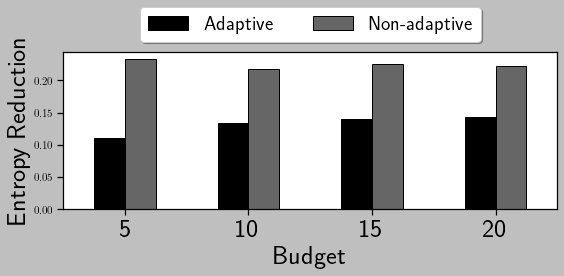

In [29]:
from matplotlib import pyplot as plt 
from matplotlib.ticker import ScalarFormatter
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

# folder = 'output/baby/CRureduct2/'
# folder = 'p/adap_products/'
folder = 'products_cr/'

# K = 32
# data = 'papers'
# data = 'restaurants'
data = 'products'
alg0 = 'greedyp'
a0 = 'greedyp'
q = 'reach'
# qset = range(1,6)
qset = 5
budgets = range(5,21,5)
print(qset)
varyK0 = [] #non-ada
varyK1  = [] #ada
est_alg = 'mcbfs'
ignore_negative = True

def remove(df):
    dfnew = pd.DataFrame()
    for name,group in df.groupby(by=['source','target']):
        cond1 = (group["H0"]<=0).any()
        cond2 = (group["DeltaH"]<=0).any()
        if cond1==False and cond2==False:
            dfnew = pd.concat([dfnew, group])
    return dfnew 

for k in budgets:
    k = str(k)
    # reduce_k_2_K_10_restaurants_greedyp_reach_dhop.queries.csv
    name0 = folder+'reduce_k_'+k+'_K_10_'+data+'_'+alg0+'_'+q+'_d_'+str(qset)+'.queries.csv'
    # print(name0)
    df0 = pd.read_csv(name0)
    # for group in df0.groupby(['source','target']):
    #     print(group)
    #     break 
    # df0 = df0[df0['r']<10]
    # print(df0['H0'])
    # df0 = df0[df0['H0'].astype(float)>0]
    df0 = remove(df0)
    df0 = df0[df0['MCalgo'] == est_alg]
    df1= df0[df0['setting'] == 'adaptive']
    df0 = df0[df0['setting'] == 'non-adaptive']
    # if ignore_negative:
    #     df0 = df0[df0['DeltaH']>0]
    #     df1 = df1[df1['DeltaH']>0]
    # df0 = df0[df0['H0'].values >0]
    # df1 = df1[df1['H0'].values >0]
    print(k,'non-ad: ',df0.shape,' ad: ',df1.shape)
    varyK0.append(df0) 
    varyK1.append(df1) 

df0 = pd.concat(varyK0)
df1 = pd.concat(varyK1)
# print(df0.groupby('r')['DeltaH'].count())
# print(df1.groupby('r')['DeltaH'].count())
final_df = pd.DataFrame(df0.groupby('r')['DeltaH'].mean()).reset_index()
final_df = final_df.rename(columns={"r": "r", "DeltaH": "Non-adaptive"})
final_df['Adaptive'] = df1.groupby('r')['DeltaH'].mean().values
final_df['ada_err'] = df0.groupby('r')['DeltaH'].std().values
final_df['nonada_err'] = df1.groupby('r')['DeltaH'].std().values
final_df['r'] = final_df['r'].astype(int)
final_df['k'] = (final_df['r']*qset/3).astype(int)
print(final_df)
# ax = final_df.plot(x="r", y=["Adaptive","Non-adaptive"], kind="bar",rot=0)
# plt.xlabel('r', fontsize=fontsize-2)
ax = final_df.plot(x="k", y=["Adaptive","Non-adaptive"], kind="bar",rot=0)
# sns.barplot(final_df, x="k",y=["Adaptive","Non-adaptive"])
plt.xlabel('Budget', fontsize=fontsize-2)
plt.ylabel('Entropy Reduction',fontsize=fontsize-2)

plt.xticks(fontsize=fontsize-2)
# plt.yticks([0.01,0.04,0.07,0.1,0.13, 0.16],fontsize=fontsize-2)
# plt.yticks([0.22,0.28,0.34,0.40],fontsize=fontsize-2)
# ax.tick_params(axis='both', labelsize=fontsize)
# plt.yscale('log',base=10)
# plt.legend(fontsize=fontsize+10,bbox_to_anchor=(1.001,0.95),frameon = False,prop={"size":20})
# plt.legend(fontsize=fontsize,loc='best',prop={"size":20})
# plt.title('Budget = '+k,fontsize=fontsize-8)
# ax = plt.gca()
# 
# 
# ax.set_yscale('log')
# ax.get_yaxis().set_major_formatter(ScalarFormatter())
# ax.tick_params(axis = 'y', which = 'both', labelsize = fontsize-2)
# ax.ticklabel_format(axis='y',style = 'sci', scilimits=(0,0))
# plt.yticks([0, 0.1,0.2,0.3,0.4], fontsize=fontsize-2)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1),\
          ncol=2, fancybox=True, shadow=True,fontsize=labelsize-2)
fname = 'figs/varyk_'+data+"_"+q+'_Q'+str(qset)+'_ad_nonad.pdf'
print(fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

5
5 non-ad:  (30, 18)  ad:  (30, 18)
10 non-ad:  (36, 18)  ad:  (36, 18)
15 non-ad:  (37, 18)  ad:  (37, 18)
20 non-ad:  (38, 18)  ad:  (38, 18)
    r  Non-adaptive   Adaptive   ada_err  nonada_err   k
0   3      4.883031   5.448524  1.842337    1.386835   5
1   6      4.727646  10.865333  1.827460    2.311193  10
2   9      4.640201  16.793963  1.808224    3.523500  15
3  12      4.915972  22.003674  1.967673    4.343358  20
figs/varyk_products_reach_Q5_ad_nonad_tm.pdf


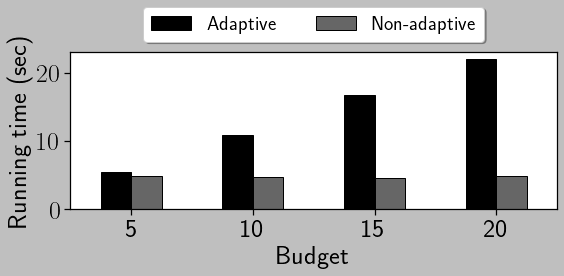

In [176]:
from matplotlib import pyplot as plt 
from matplotlib.ticker import ScalarFormatter
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

# folder = 'output/baby/CRureduct2/'
# folder = 'p/adap_products/'
folder = 'products_cr/'

# K = 32
# data = 'papers'
# data = 'restaurants'
data = 'products'
alg0 = 'greedyp'
a0 = 'greedyp'
q = 'reach'
# qset = range(1,6)
qset = 5
budgets = range(5,21,5)
print(qset)
varyK0 = [] #non-ada
varyK1  = [] #ada
est_alg = 'mcbfs'
ignore_negative = True

def remove(df):
    dfnew = pd.DataFrame()
    for name,group in df.groupby(by=['source','target']):
        cond1 = (group["H0"]<=0).any()
        cond2 = (group["DeltaH"]<=0).any()
        if cond1==False and cond2==False:
            dfnew = pd.concat([dfnew, group])
    return dfnew 

for k in budgets:
    k = str(k)
    # reduce_k_2_K_10_restaurants_greedyp_reach_dhop.queries.csv
    name0 = folder+'reduce_k_'+k+'_K_10_'+data+'_'+alg0+'_'+q+'_d_'+str(qset)+'.queries.csv'
    # print(name0)
    df0 = pd.read_csv(name0)
    # for group in df0.groupby(['source','target']):
    #     print(group)
    #     break 
    # df0 = df0[df0['r']<10]
    # print(df0['H0'])
    # df0 = df0[df0['H0'].astype(float)>0]
    df0 = remove(df0)
    df0 = df0[df0['MCalgo'] == est_alg]
    df1= df0[df0['setting'] == 'adaptive']
    df0 = df0[df0['setting'] == 'non-adaptive']
    # if ignore_negative:
    #     df0 = df0[df0['DeltaH']>0]
    #     df1 = df1[df1['DeltaH']>0]
    # df0 = df0[df0['H0'].values >0]
    # df1 = df1[df1['H0'].values >0]
    print(k,'non-ad: ',df0.shape,' ad: ',df1.shape)
    varyK0.append(df0) 
    varyK1.append(df1) 

df0 = pd.concat(varyK0)
df1 = pd.concat(varyK1)
# print(df0.groupby('r')['DeltaH'].count())
# print(df1.groupby('r')['DeltaH'].count())
col = 'execution_time'
final_df = pd.DataFrame(df0.groupby('r')[col].mean()).reset_index()
final_df = final_df.rename(columns={"r": "r", col: "Non-adaptive"})
final_df['Adaptive'] = df1.groupby('r')[col].mean().values
final_df['ada_err'] = df0.groupby('r')[col].std().values
final_df['nonada_err'] = df1.groupby('r')[col].std().values
final_df['r'] = final_df['r'].astype(int)
final_df['k'] = (final_df['r']*qset/3).astype(int)
print(final_df)
# ax = final_df.plot(x="r", y=["Adaptive","Non-adaptive"], kind="bar",rot=0)
# plt.xlabel('r', fontsize=fontsize-2)
ax = final_df.plot(x="k", y=["Adaptive","Non-adaptive"], kind="bar",rot=0)
# sns.barplot(final_df, x="k",y=["Adaptive","Non-adaptive"])
plt.xlabel('Budget', fontsize=fontsize-2)
plt.ylabel('Running time (sec)',fontsize=fontsize-2)

plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
# ax.tick_params(axis='both', labelsize=fontsize)
# plt.yscale('log',base=10)
# plt.legend(fontsize=fontsize+10,bbox_to_anchor=(1.001,0.95),frameon = False,prop={"size":20})
# plt.legend(fontsize=fontsize,loc='best',prop={"size":20})
# plt.title('Budget = '+k,fontsize=fontsize-8)
# ax = plt.gca()
# 
# 
# ax.set_yscale('log')
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.tick_params(axis = 'y', which = 'both', labelsize = fontsize-2)
# ax.ticklabel_format(axis='y',style = 'sci', scilimits=(0,0))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1),\
          ncol=2, fancybox=True, shadow=True,fontsize=labelsize-2)
fname = 'figs/varyk_'+data+"_"+q+'_Q'+str(qset)+'_ad_nonad_tm.pdf'
print(fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

In [59]:
# df0 = pd.read_csv('p/adap_products/reduce_k_10_K_10_products_greedyp_reach_d_5.queries.csv')
# dfnew = pd.DataFrame()
# for name,group in df0.groupby(by=['source','target']):
#     cond1 = (group["H0"]<=0).any()
#     cond2 = (group["DeltaH"]<=0).any()
#     if cond1==False and cond2==False:
#         dfnew = pd.concat([dfnew, group])
# print(dfnew)

Comparison with baseline
-----

---- budget ----  2
---- budget ----  3
---- budget ----  4
---- budget ----  5
---- budget ----  6
figs/sota_products_effec.pdf


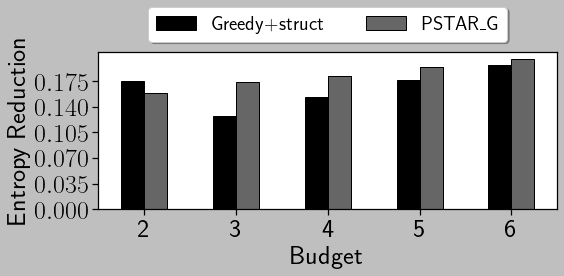

In [88]:
from matplotlib import pyplot as plt 
from matplotlib.ticker import ScalarFormatter
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

means = []
algorithms = []
times = []
budgets = []
data = 'products'
for k in [2,3,4,5,6]:
    print('---- budget ---- ',k)
    b_df = pd.read_csv('7_3_2/TKDE_'+data+'_'+str(k)+'_maxd_4.csv')
    o_df1 = pd.read_csv('7_3_2/reduce_k_'+str(k)+'_K_10_'+data+'_greedyp_reach_d_4.queries.csv')
    o_df2 = pd.read_csv('7_3_2/reduce_k_'+str(k)+'_K_10_'+data+'_greedyp_reach_d_2.queries.csv')
    cols = ['DeltaH','source','target','execution_time','H0','algorithm','qset']
    concat_df = pd.concat((b_df[cols],o_df1[cols],o_df2[cols]))
    concat_df = remove(concat_df)
    b_df = concat_df[concat_df['algorithm']=='TKDE17']
    o_df = concat_df[concat_df['algorithm']=='greedy+struct']
    # o_df = pd.concat([o_df1,o_df2])
    # # b_df = b_df[b_df.qset == 2]
    # # o_df = o_df[o_df.qset == 2]
    # # b_df = b_df[b_df.qset == 4]
    # # o_df = o_df[o_df.qset == 4]
    # b_df = remove(b_df)
    # o_df = remove(o_df)

    
    means.append(b_df['DeltaH'].mean())
    times.append(b_df['execution_time'].mean())
    budgets.append(k)
    algorithms.append('PSTAR\_G')

    means.append(o_df['DeltaH'].mean())
    times.append(o_df['execution_time'].mean())
    budgets.append(k)
    algorithms.append('Greedy+struct')
    
    # qsets = [2,4]
    # for q in qsets:
    #     # print(b_df.groupby("qset"))
    #     df = b_df[b_df.qset == q]
    #     print('baeline shape: ',df.shape)
    #     print('Baseline: ', q,' ',df['DeltaH'].mean())
    #     df = o_df[o_df.qset == q]
    #     # print(df.head())
    #     print('ours shape: ',df.shape)
    #     print('Ours: ', q,' ',df['DeltaH'].mean())
df = pd.DataFrame({'ent': means, 'time': times,'budget':budgets,'algo':algorithms})
# df.head()
# sns.catplot(data = df, x='budget',y='ent',hue = 'algo',kind = 'bar')
# df.plot.bar(rot=0)
# axes = df.plot.bar(rot=0, subplots=True, x = 'budget')
# axes[1].legend(loc=2)  
ax = df.pivot(index='budget', columns='algo', values='ent').plot(kind='bar',rot=0)
plt.xlabel('Budget', fontsize=fontsize-2)
plt.ylabel('Entropy Reduction',fontsize=fontsize-2)

plt.xticks(fontsize=fontsize-2)
plt.yticks(np.linspace(0,0.175,6), fontsize=fontsize-2)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1),\
          ncol=2, fancybox=True, shadow=True,fontsize=labelsize-2)
fname = 'figs/sota_'+data+'_effec.pdf'
print(fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

---- budget ----  2
         H0                        edges        H*  execution_time  k  \
0  0.000000                           []  0.000000       98.575383  2   
1  0.281762   [(267, 1252), (271, 1806)]  0.233249      195.357685  2   
2  0.999233  [(428, 1666), (1003, 1726)]  0.994539       92.891430  2   
3  0.587645  [(1079, 1563), (109, 1484)]  0.528110       82.345327  2   
4  0.921876    [(778, 1638), (49, 1206)]  0.784398       79.667567  2   

  algorithm    DeltaH  |DeltaH|  source  target            history_Hk  qset  
0    TKDE17  0.000000  0.000000    2167    1830  0.0000,0.0000,0.0000     4  
1    TKDE17  0.048513  0.048513    1806    1252  0.2818,0.2580,0.2332     2  
2    TKDE17  0.004694  0.004694     428    1003  0.9992,0.9992,0.9945     4  
3    TKDE17  0.059535  0.059535     109    1079  0.5876,0.6016,0.5281     2  
4    TKDE17  0.137478  0.137478     778      49  0.9219,0.8439,0.7844     4  
---- budget ----  3
         H0                                     edges

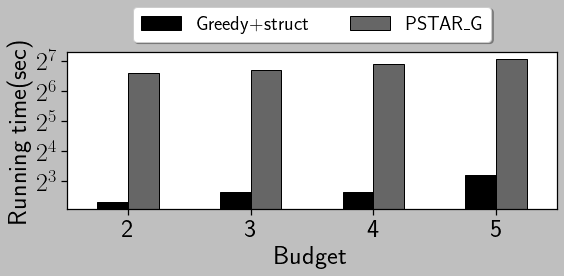

In [177]:
from matplotlib import pyplot as plt 
from matplotlib.ticker import ScalarFormatter
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

means = []
algorithms = []
times = []
budgets = []
data = 'products'
for k in [2,3,4,5]:
    print('---- budget ---- ',k)
    b_df = pd.read_csv('7_3_2/TKDE_'+data+'_'+str(k)+'_maxd_4.csv')
    o_df1 = pd.read_csv('7_3_2/reduce_k_'+str(k)+'_K_10_'+data+'_greedyp_reach_d_4.queries.csv')
    o_df2 = pd.read_csv('7_3_2/reduce_k_'+str(k)+'_K_10_'+data+'_greedyp_reach_d_2.queries.csv')
    o_df = pd.concat([o_df1,o_df2])
    print(b_df.head())
    # print(o_df.shape)
    b_df = remove(b_df)
    o_df = remove(o_df)
    # print('Baseline: ',b_df['DeltaH'].mean())
    # print('Ours:  ',o_df['DeltaH'].mean())
    
    means.append(b_df['DeltaH'].mean())
    times.append(b_df['execution_time'].mean())
    budgets.append(k)
    algorithms.append('PSTAR\_G')

    means.append(o_df['DeltaH'].mean())
    times.append(o_df['execution_time'].mean())
    budgets.append(k)
    algorithms.append('Greedy+struct')
    
    # qsets = [2,4]
    # for q in qsets:
    #     # print(b_df.groupby("qset"))
    #     df = b_df[b_df.qset == q]
    #     print('baeline shape: ',df.shape)
    #     print('Baseline: ', q,' ',df['DeltaH'].mean())
    #     df = o_df[o_df.qset == q]
    #     # print(df.head())
    #     print('ours shape: ',df.shape)
    #     print('Ours: ', q,' ',df['DeltaH'].mean())
df = pd.DataFrame({'ent': means, 'time': times,'budget':budgets,'algo':algorithms})
# df.head()
# sns.catplot(data = df, x='budget',y='ent',hue = 'algo',kind = 'bar')
# df.plot.bar(rot=0)
# axes = df.plot.bar(rot=0, subplots=True, x = 'budget')
# axes[1].legend(loc=2)  
ax = df.pivot(index='budget', columns='algo', values='time').plot(kind='bar',rot=0)
plt.xlabel('Budget', fontsize=fontsize-2)
plt.ylabel('Running time(sec)',fontsize=fontsize-2)

plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
plt.yscale('log',base=2)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1),\
          ncol=2, fancybox=True, shadow=True,fontsize=labelsize-2)
fname = 'figs/sota_'+data+'_effic.pdf'
print(fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()

---- budget ----  5
---- budget ----  10
---- budget ----  15
---- budget ----  20
      DeltaH  execution_time   k     r
r                                     
3   0.068159        7.303768   5   r=3
6   0.071746        7.574317   5   r=6
9   0.052704        7.278872   5   r=9
12  0.067164        7.281310   5  r=12
3   0.093399       14.754673  10   r=3


<ipython-input-167-a1fb00241069>:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp = o_df1[cols].groupby('r')['DeltaH','execution_time'].mean()


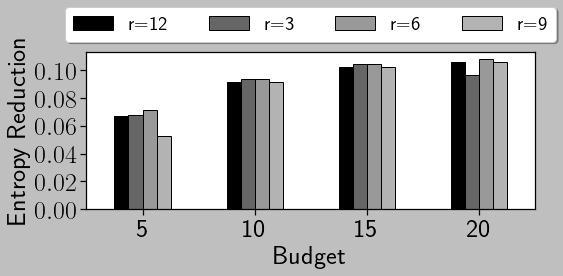

In [167]:
from matplotlib import pyplot as plt 
from matplotlib.ticker import ScalarFormatter
plt.rcParams['text.usetex'] = True
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns 
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 28
labelsize = 22
lw = 2

means = []
algorithms = []
times = []
budgets = []
data = 'products'
dfs = []
for k in [5,10,15,20]:
    print('---- budget ---- ',k)
    o_df1 = pd.read_csv('7_3_4/reduce_k_'+str(k)+'_K_10_'+data+'_greedyp_reach_d_5.queries.csv')
    cols = ['DeltaH','source','target','execution_time','H0','algorithm','qset','r','k']
    grp = o_df1[cols].groupby('r')['DeltaH','execution_time'].mean()
    grp['k'] = k
    grp['r']= grp.index
    # print(grp)
    grp['r'] = 'r='+grp['r'].astype(str)
    dfs.append(grp)

df = pd.concat(dfs)
# df.gro
# df.shape 
# means.append(b_df['DeltaH'].mean())
# times.append(b_df['execution_time'].mean())
# budgets.append(k)
# algorithms.append('PSTAR\_G')

# means.append(o_df['DeltaH'].mean())
# times.append(o_df['execution_time'].mean())
# budgets.append(k)
# algorithms.append('Greedy+struct')

# # qsets = [2,4]
# # for q in qsets:
# #     # print(b_df.groupby("qset"))
# #     df = b_df[b_df.qset == q]
# #     print('baeline shape: ',df.shape)
# #     print('Baseline: ', q,' ',df['DeltaH'].mean())
# #     df = o_df[o_df.qset == q]
# #     # print(df.head())
# #     print('ours shape: ',df.shape)
# #     print('Ours: ', q,' ',df['DeltaH'].mean())
# df = pd.DataFrame({'ent': means, 'time': times,'budget':budgets,'algo':algorithms})
# # df.head()
# # sns.catplot(data = df, x='budget',y='ent',hue = 'algo',kind = 'bar')
# # df.plot.bar(rot=0)
# # axes = df.plot.bar(rot=0, subplots=True, x = 'budget')
# # axes[1].legend(loc=2)  
print(df.head())
ax = df.pivot(index='k', columns='r', values='DeltaH').plot(kind='bar',rot=0)
plt.xlabel('Budget', fontsize=fontsize-2)
plt.ylabel('Entropy Reduction',fontsize=fontsize-2)

plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1),\
          ncol=4, fancybox=True, shadow=True,fontsize=labelsize-2)
fname = 'figs/hypparam_'+data+'_effec.pdf'
# print(fname)
plt.tight_layout()
plt.savefig(fname)
plt.show()